# Why PCA Looks Triangular (often in computational biology)

#### Nikolay Oskolkov, SciLifeLab, NBIS Long Term Support, [nikolay.oskolkov@scilifelab.se](nikolay.oskolkov@scilifelab.se)

<h3><center>Abstract</center></h3>
In this notebook, we will discuss some peculiarities of data that we often work with in computational biology that often results in triangular looking PCA structures, however this does not always persist in tSNE / UMAP dimension reduction.

### Table of Contents:
* [Triangular PCA plots everywhere in Life Sciences](#Triangular-PCA-plots-everywhere-in-Life-Sciences)
* [PCA on data from different probability distributions](#PCA-on-data-from-different-probability-distributions)
* [Data matrix with block structure and arch effect](#Data-matrix-with-block-structure-and-arch-effect)
* [Data matrix with fuzzy block structure and horseshoue effect](#Data-matrix-with-fuzzy-block-structure-and-horseshoue-effect)

### Triangular PCA plots everywhere in Life Sciences  <a class="anchor" id="Triangular-PCA-plots-everywhere-in-Life-Sciences"></a>

Visualization of biological high-dimensional data is often performed with linear dimensionality reduction techniques such as PCA / MDS as well as non-linear tSNE and UMAP. Remarkably, across many data types in Life Sciences, such as microbial ecology, cell biology, medical and evolutionary genetics, one can observe PCA taking a particular triangular shape as in the figures below.

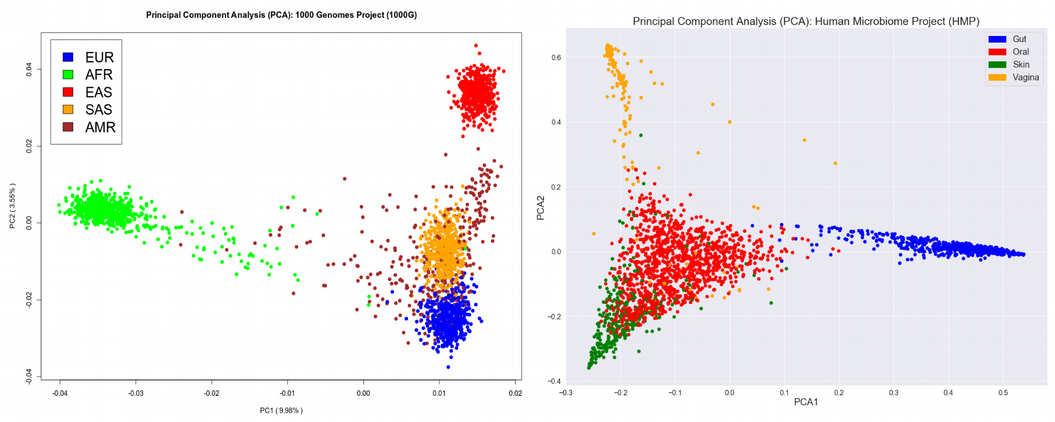

In [2]:
from IPython.display import Image
Image('/home/nikolay/Documents/Medium/WhyPCALooksTriangular/images/TriangularPCA.png', width = 1000)

In the figure above, genetic variation differences across world's populations from the 1000 Genomes Project (1000G) are presented at the left, and microbial abundance differences across different human tissues from the Human Microbiome Project (HMP) is shown in the right. Also in single cell gene expression analysis the trianglar shapes of PCA plots are quite common as it can be see from the PCA on gene expression from Cancer Associated Fibroblasts (CAFs) below on the left, and Innate lymphoid cells (ILCs) on the right.

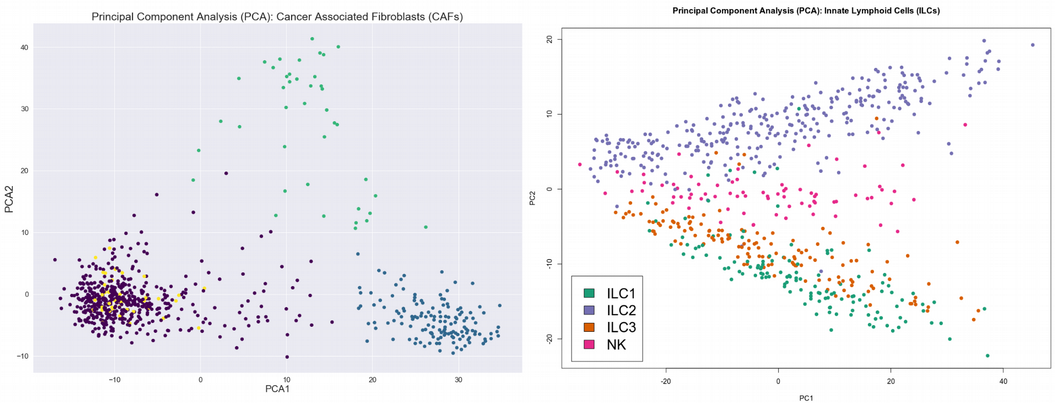

In [251]:
from IPython.display import Image
Image('/home/nikolay/Documents/Medium/WhyPCALooksTriangular/images/TriangularSingleCell.png', width = 1000)

### PCA on data from different probability distributions  <a class="anchor" id="PCA-on-data-from-different-probability-distributions"></a>

It turns out that some data types in Life Sciences can produce triangle / wedge - shaped PCA plots because of the non-gaussian nature of the data, i.e. if the data was not properly transformed prior to computing PCA. To demonstrate this, let us generate random data matrices without any correlation using different probability distributions such as Poisson, Binomial etc. that are typical in Life Sciences.

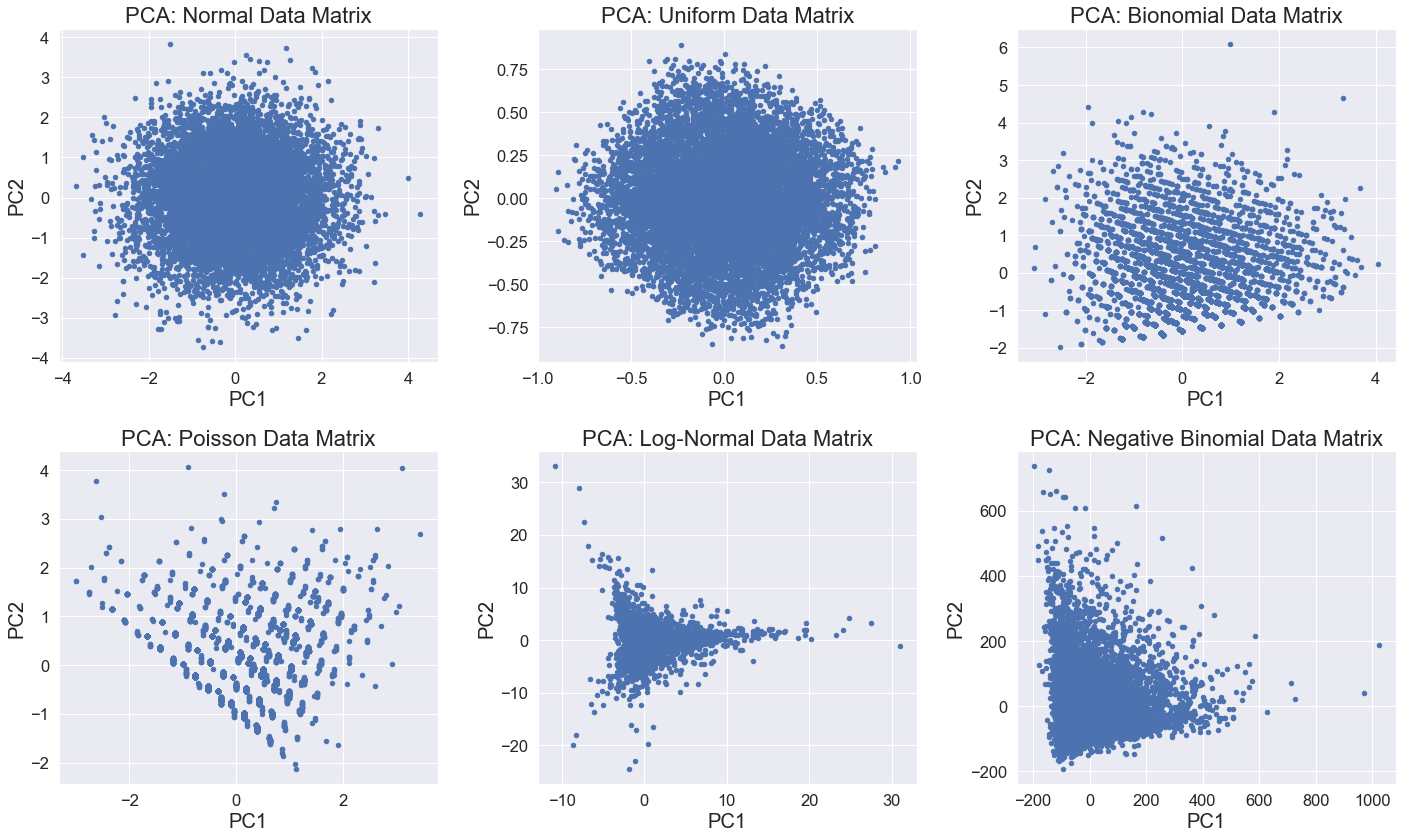

In [531]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


def plot_PCA(data_matrix, distribution_str):
    X_reduced = PCA(n_components = 2).fit_transform(data_matrix)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 20, c = 'b')
    plt.title('PCA: ' + distribution_str + ' Data Matrix', fontsize = 22)
    plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)

np.random.seed(15)
figure = plt.figure(figsize = (20, 12))

plt.subplot(231)
data_matrix = np.random.normal(0, 1, 50000).reshape(10000, 5)
plot_PCA(data_matrix, 'Normal')

plt.subplot(232)
data_matrix = np.random.uniform(0, 1, 50000).reshape(10000, 5)
plot_PCA(data_matrix, 'Uniform')

plt.subplot(233)
data_matrix = np.random.binomial(10, 0.1, 50000).reshape(10000, 5)
plot_PCA(data_matrix, 'Bionomial')

plt.subplot(234)
data_matrix = np.random.poisson(0.5, 50000).reshape(10000, 5)
plot_PCA(data_matrix, 'Poisson')

plt.subplot(235)
data_matrix = np.random.lognormal(0, 1, 50000).reshape(10000, 5)
plot_PCA(data_matrix, 'Log-Normal')

plt.subplot(236)
data_matrix = np.random.negative_binomial(1, 0.01, 50000).reshape(10000, 5)
plot_PCA(data_matrix, 'Negative Binomial')

figure.tight_layout()
plt.show()

Here, one can observe that purely normally distributed data without any correlation structure should give nearly spherical spread of the data points around the origin in a PCA plot. Data follwing uniform distribution produce a funny square-looking PCA, as if one pulls the gaussian circle (on the previous plot) in two orthogonal directions. In contrast, Poisson, Log-Normal and Negative Bionomial distributed data tend to form triangular or wedge-looking structures on a PCA plot. Even, Binomially distributed data can often give a PCA that looks like a wedge or triangle. The thing is that the simulated samples are supposed to be independent, i.e. not correlation was put inside the data matrices, and the samples are not supposed to form clusters. However, with some imagination, one can overinterpet the points in the corners of the trianguler / wedge PCA shapes as belonging to different clusters / populations.

The triangular / wedge - looking structures on random data can partly be explained by non-gaussianity of many types of data in Life Sciences that seems to violate a very fundamantal assumption of PCA. Namely, PCA can be viewed as approximating a data set with a product of two matrices (loadings and scores) with the following implicit minimization of the squared error between the data and the approximation. Minimization of the squared error implicitly means that one assumes the normal / gaussian distribution of the approximation error or residuals, which might be problematic to satisfy if the data matrix X does not follow gaussian distribution. One can ask whether it is ok at all to use PCA on non-normally distributed data? In practice, PCA is often run on non-normally distributed data providing some data transform has been applied prior to computing PCA.

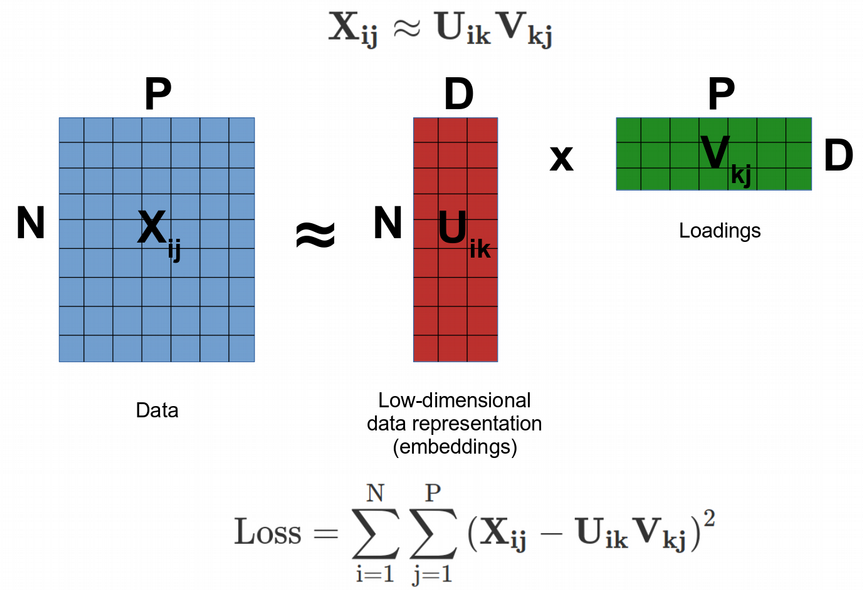

In [558]:
from IPython.display import Image
Image('/home/nikolay/Documents/Medium/WhyPCALooksTriangular/images/MatrixFactorization.png', width = 1000)

It turns out that standardization and log-transform is typically applied to many Life Science data, that masks the non-gaussianity of the data and fulfills the normality assumption of the PCA. In practice, it results in a less pronounced tringular shape of the PCA plots. Let us apply log-transoform to the previously simulated data matrices and observe the difference in PCA plots.

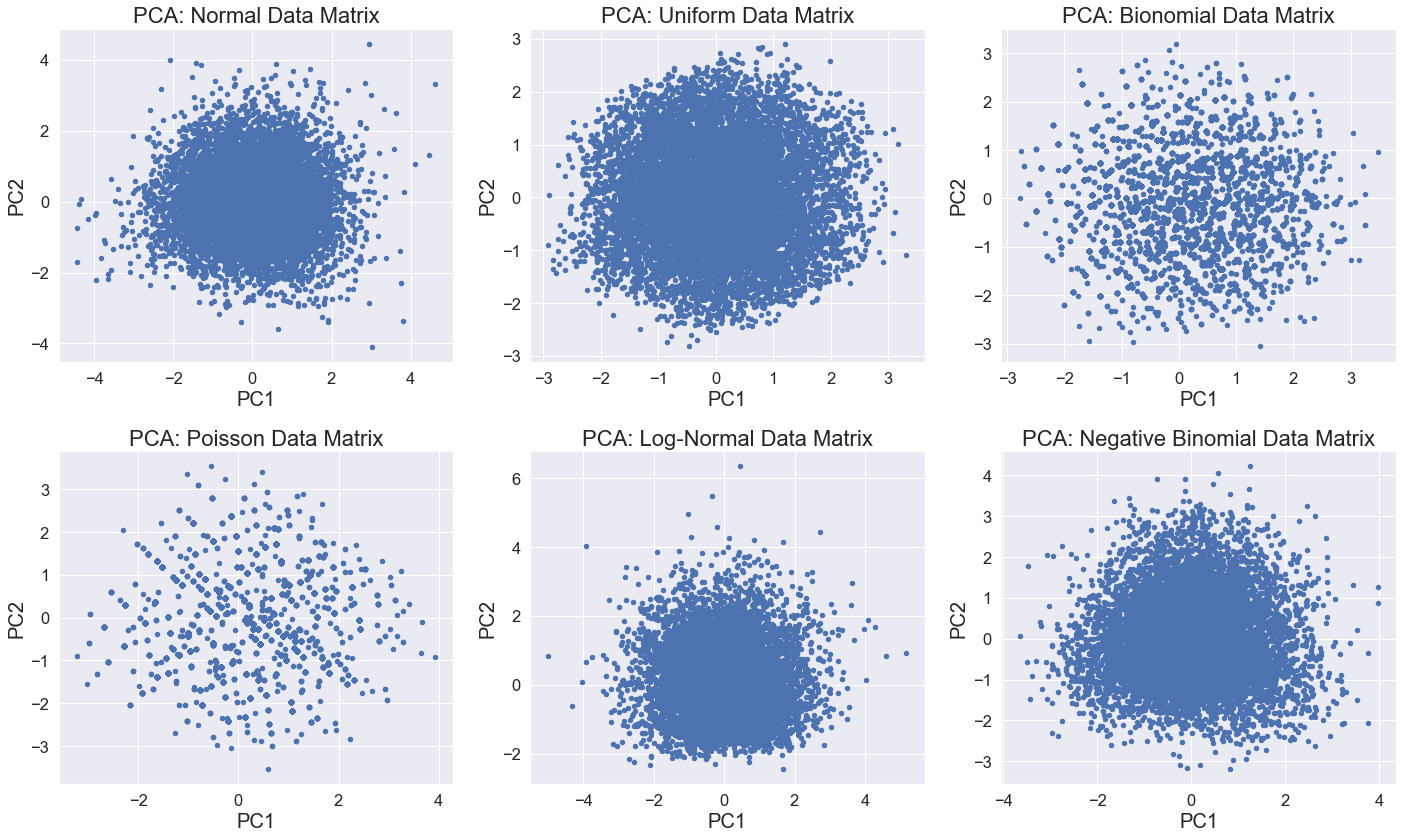

In [553]:
def plot_transformed_PCA(data_matrix, distribution_str):
    
    data_matrix = np.log(data_matrix + np.abs(np.min(data_matrix)) + 1)
    data_matrix = (data_matrix - np.mean(data_matrix, axis = 0)) / np.std(data_matrix, axis = 0)
    
    X_reduced = PCA(n_components = 2).fit_transform(data_matrix)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 20, c = 'b')
    plt.title('PCA: ' + distribution_str + ' Data Matrix', fontsize = 22)
    plt.xlabel("PC1", fontsize = 20); plt.ylabel("PC2", fontsize = 20)

np.random.seed(1)
figure = plt.figure(figsize = (20, 12))

plt.subplot(231)
data_matrix = np.random.normal(0, 1, 50000).reshape(10000, 5)
plot_transformed_PCA(data_matrix, 'Normal')

plt.subplot(232)
data_matrix = np.random.uniform(0, 1, 50000).reshape(10000, 5)
plot_transformed_PCA(data_matrix, 'Uniform')

plt.subplot(233)
data_matrix = np.random.binomial(10, 0.1, 50000).reshape(10000, 5)
plot_transformed_PCA(data_matrix, 'Bionomial')

plt.subplot(234)
data_matrix = np.random.poisson(0.5, 50000).reshape(10000, 5)
plot_transformed_PCA(data_matrix, 'Poisson')

plt.subplot(235)
data_matrix = np.random.lognormal(0, 1, 50000).reshape(10000, 5)
plot_transformed_PCA(data_matrix, 'Log-Normal')

plt.subplot(236)
data_matrix = np.random.negative_binomial(1, 0.01, 50000).reshape(10000, 5)
plot_transformed_PCA(data_matrix, 'Negative Binomial')

figure.tight_layout()
plt.show()

We can observe that the spread of the data points in the PCA plots becomes more and more spherical once the log-transform and standardization has been applied. This intuitivaly means that there is no direction of preferred orientation of the data in the high-dimensional space, i.e. all directions are equally informative / important.

The above example dealt with purely random data without any correlation between samples. Often, there is a lot of correlation present in gene expression or microbial abundance data, i.e. samples or cells are not independent and form clusters. In this case, one can obtain meaningful triangular PCA plot where the corners of the triangle do mean different sample populations. One extreme case is explained below and is called the arch (or similar horseshoue) effect.

### Data matrix with block structure and arch effect  <a class="anchor" id="Data-matrix-with-block-structure-and-arch-effect"></a>

The triangular shape of the PCA plots seems to have something to do with so-called **arch** or **horseshoue** effect, which is not particularly well studied in genetics or single cell analysis, to my experience, but is pretty well known in microbial ecology. One needs to check some [old discussions](https://stats.stackexchange.com/questions/158552/what-is-the-horseshoe-effect-and-or-the-arch-effect-in-pca-correspondence) to get more information about the two effects. There is also an [excellent paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5320001/) explaining in depth the origin of the horshoue effect that I highly recommend to read.

It turns out that one can get a triangular looking PCA when there is a strong correlation between statistical observations, i.e. when sampes / cells belong to distinct clusters / populations. In this case, the data matrix has a peculiar form: one can visually observe blocks of elements with large values for some samples and some variables while low values (zeros) are everywhere else in the matrix. Let us simulate a data matrix with two such blocks and visualize the elements of the matrix as a heatmap..

In [559]:
import numpy as np
import pandas as pd

n_blocks = 2
block_size = 100
min_count = 0
max_count = 100

np.random.seed(1)

#Initialization
block_sub_matrix = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix[:, 0:block_size] = np.random.randint(min_count, max_count, size = (block_size, block_size))
block_matrix = block_sub_matrix
#Populating block matrix
for j in range(block_size, n_blocks*block_size, block_size):
    block_sub_matrix = np.block([np.zeros((block_size, block_size))]*n_blocks)
    block_sub_matrix[:,j:(j+block_size)] = np.random.randint(min_count, max_count, size = (block_size,block_size))
    block_matrix = np.vstack((block_matrix, block_sub_matrix))

block_df = pd.DataFrame(block_matrix, columns = ['V' + str(i) for i in range(block_matrix.shape[1])], 
                        index = ['S' + str(i) for i in range(block_matrix.shape[0])])
block_df

V0    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  V190  \
S0    37.0  12.0  72.0   9.0  75.0   5.0  79.0  64.0  16.0   1.0  ...   0.0   
S1     0.0  77.0   6.0  52.0  85.0  70.0   2.0  76.0  91.0  21.0  ...   0.0   
S2    40.0  78.0  45.0  87.0  16.0  28.0  45.0  67.0  66.0  78.0  ...   0.0   
S3     0.0  86.0  16.0  19.0   9.0  92.0  51.0  10.0  68.0  23.0  ...   0.0   
S4    35.0  41.0  81.0   2.0  85.0  93.0  36.0  46.0  80.0  27.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
S195   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  79.0   
S196   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  20.0   
S197   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  79.0   
S198   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  59.0   
S199   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  44.0   

      V191  V192  V193  V194  V195  V196  V197  V198  V199  
S0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
S195   1.0  72.0   7.0  83.0   6.0   6.0  48.0  54.0  68.0  
S196  20.0  63.0  19.0  84.0   4.0  57.0  61.0   2.0  55.0  
S197  26.0  89.0  16.0   4.0  59.0  18.0   0.0  95.0  26.0  
S198  30.0  89.0  41.0  49.0  86.0  76.0  96.0  13.0  10.0  
S199  21.0  71.0  55.0  80.0  34.0  11.0  62.0  46.0  95.0  

[200 rows x 200 columns]

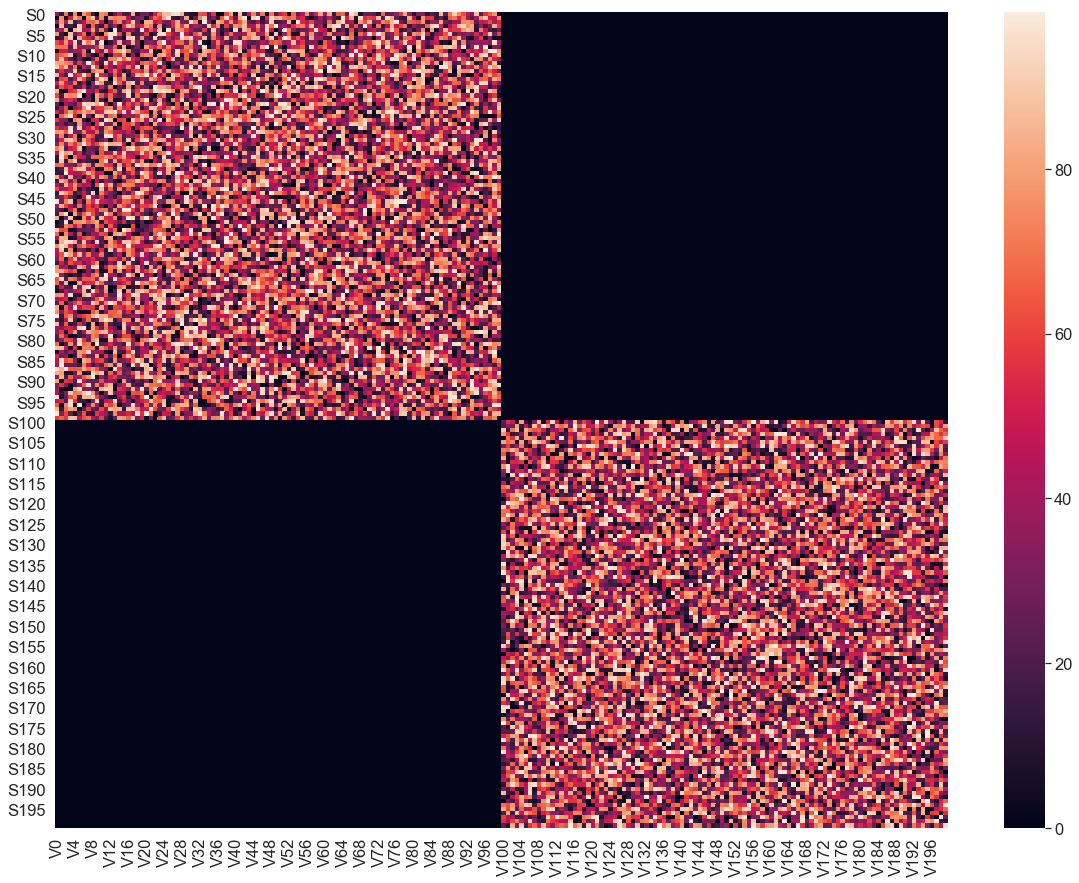

In [560]:
import seaborn as sns
plt.figure(figsize = (20, 15))
sns.heatmap(block_df)
plt.show()

The data matrix simulated above contains 200 samples (S0,..., S199) and 200 variables (V0,...,V199). The darker area in the heatmap corresponds to zero elements of the matrix while the brighter colors correspond to larger values of the elements of the matrix. Therefore, the data matrix consists of two clear blocks / clusters / populations, where samples S0,...,S99 seem to be completely dicoupled from the samples S100,...,S199 seems they do not have common variables, i.e. variables V0,...,V99 have non-zero values only for the samples S0,...,S99, while variables V100,...,V199 have non-zero values only for the samples S100,...,S199. This is an extreme decoupling, for real world projects this is rarely the case, but this simulation will help us to build our intuition about what causes trianguler structures in PCA plots. In microbial ecology, people usually talk about environmentsl **gradients** that cause such block-looking data (pH, temperature etc.). By averaging elements across the variables in both blocks, one can indeed view this data matrix as if two non-interacting **species** are present in the data that do not share environment, i.e. one can't find a sample where both species are present.

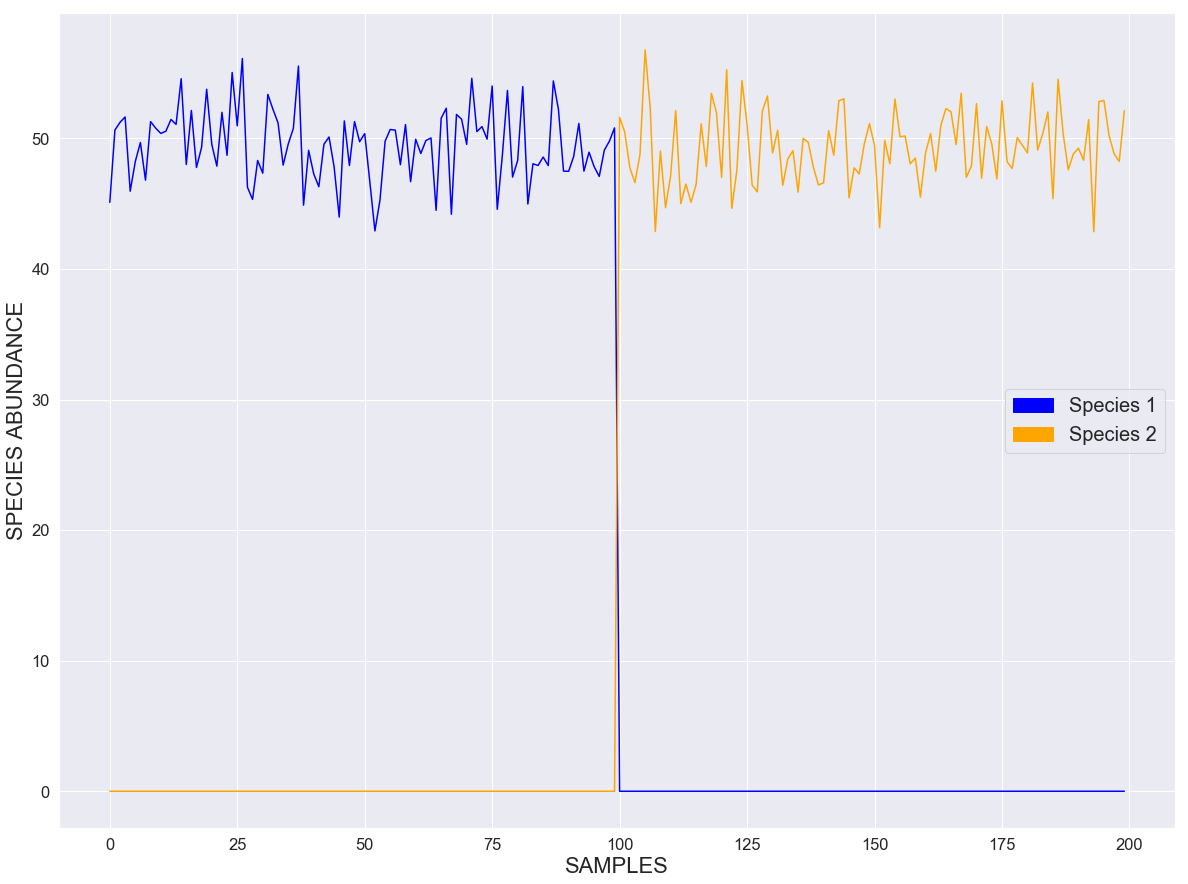

In [617]:
import seaborn as sns
sns.set(font_scale = 1.5)

plt.figure(figsize = (20, 15))

species1 = list(block_df.iloc[:,0:99].mean(axis = 1))
species2 = list(block_df.iloc[:,100:199].mean(axis = 1))

plt.plot(range(0,200,1), species1, color = 'blue')
plt.plot(range(0,200,1), species2, color = 'orange')
plt.ylabel('SPECIES ABUNDANCE', fontsize = 22)
plt.xlabel('SAMPLES', fontsize = 22)

from matplotlib import cm
import matplotlib.patches as mpatches
my_legends = [mpatches.Patch(color = 'blue', label = 'Species 1'), 
              mpatches.Patch(color = 'orange', label = 'Species 2')]
plt.legend(handles = my_legends, fontsize = 20)

plt.show()

Above, one can see that if samples happen to be ordered by some strong **environmental gradient**, this might result in a situation when certain species are abundant in a group of samples but completely absent in other groups. For example, soil microbiome might be very differnt from marine microbiome. In this case, it is generally become more and more problemetic to compute correct similarities between the samples from extremely different environments. However, here, for building our intuition, let us now compute a PCA on the block data matrix described above and visualize the variance explained by each pricipal component. For comparison, we will also provide a tSNE plot.

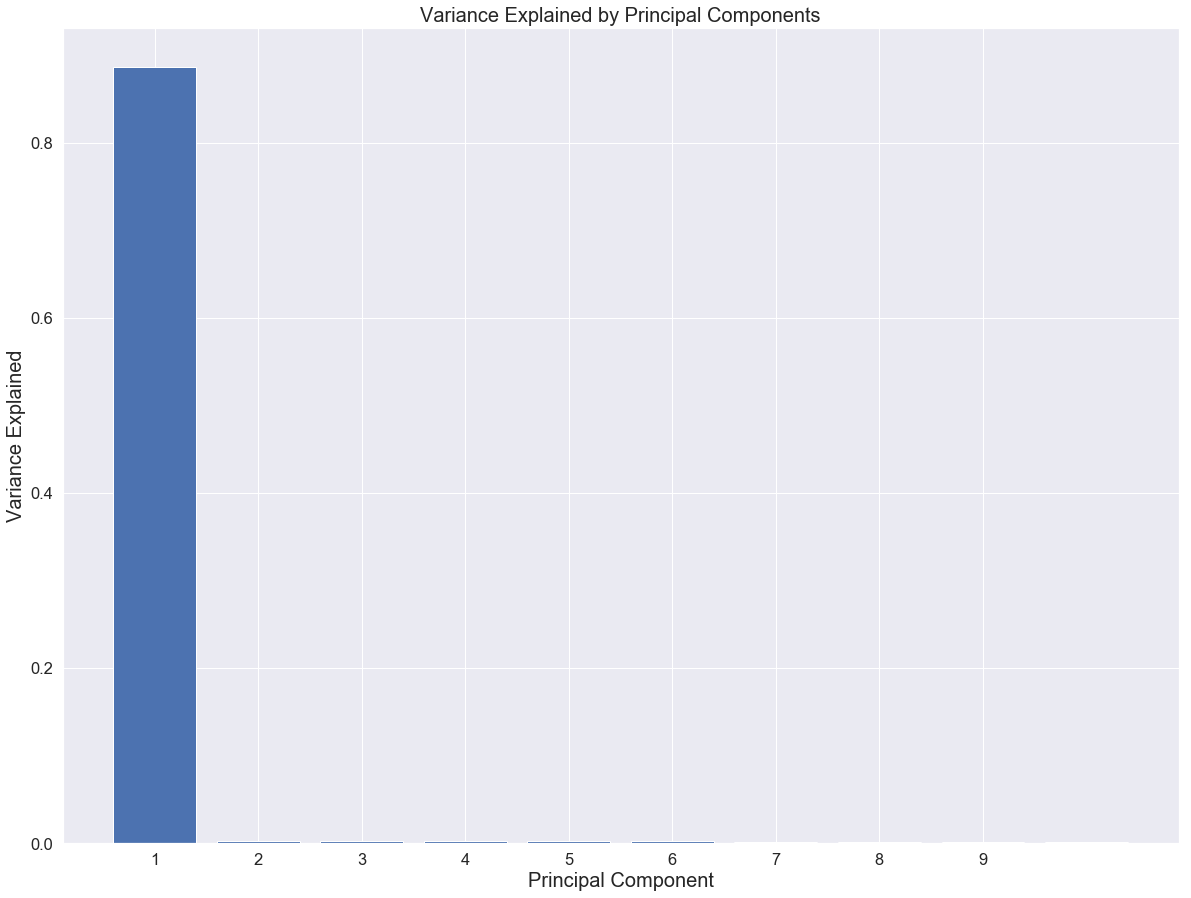

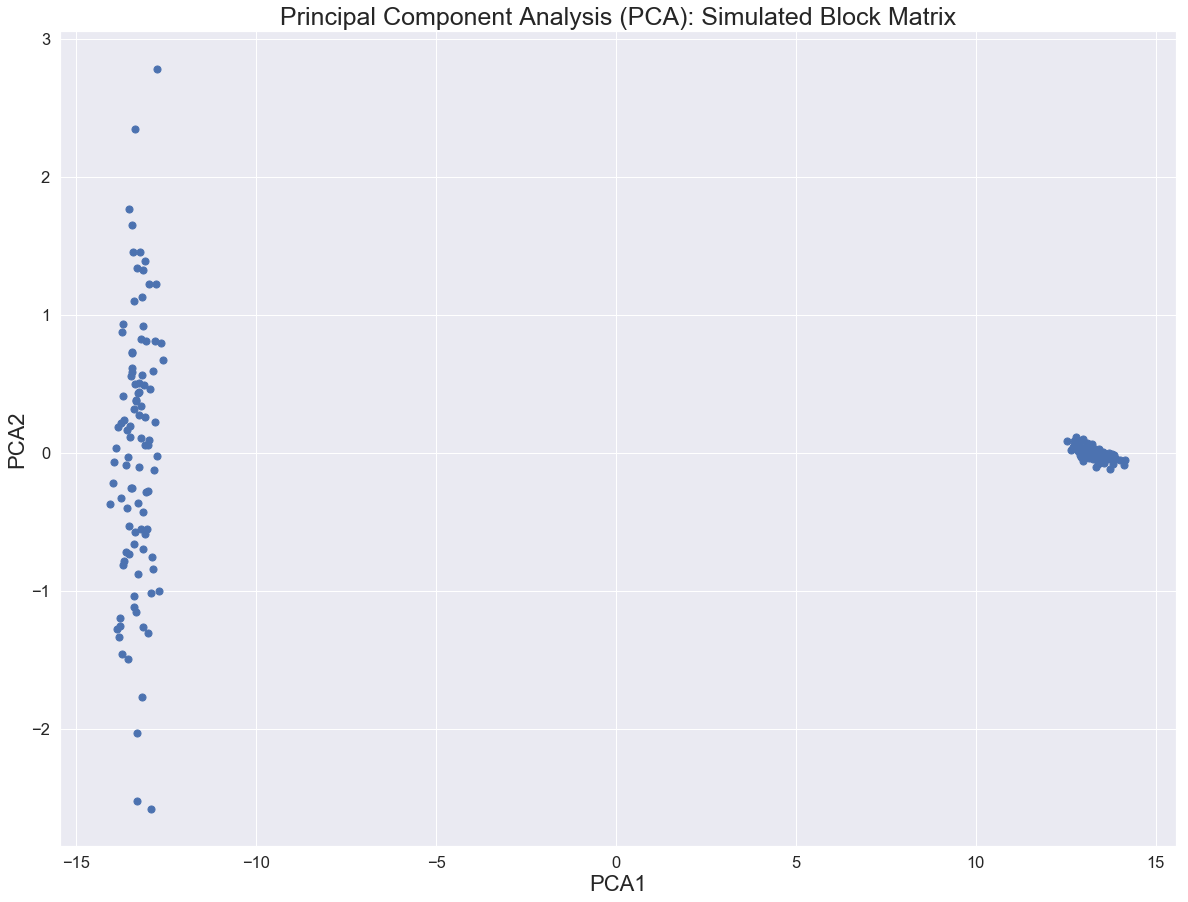

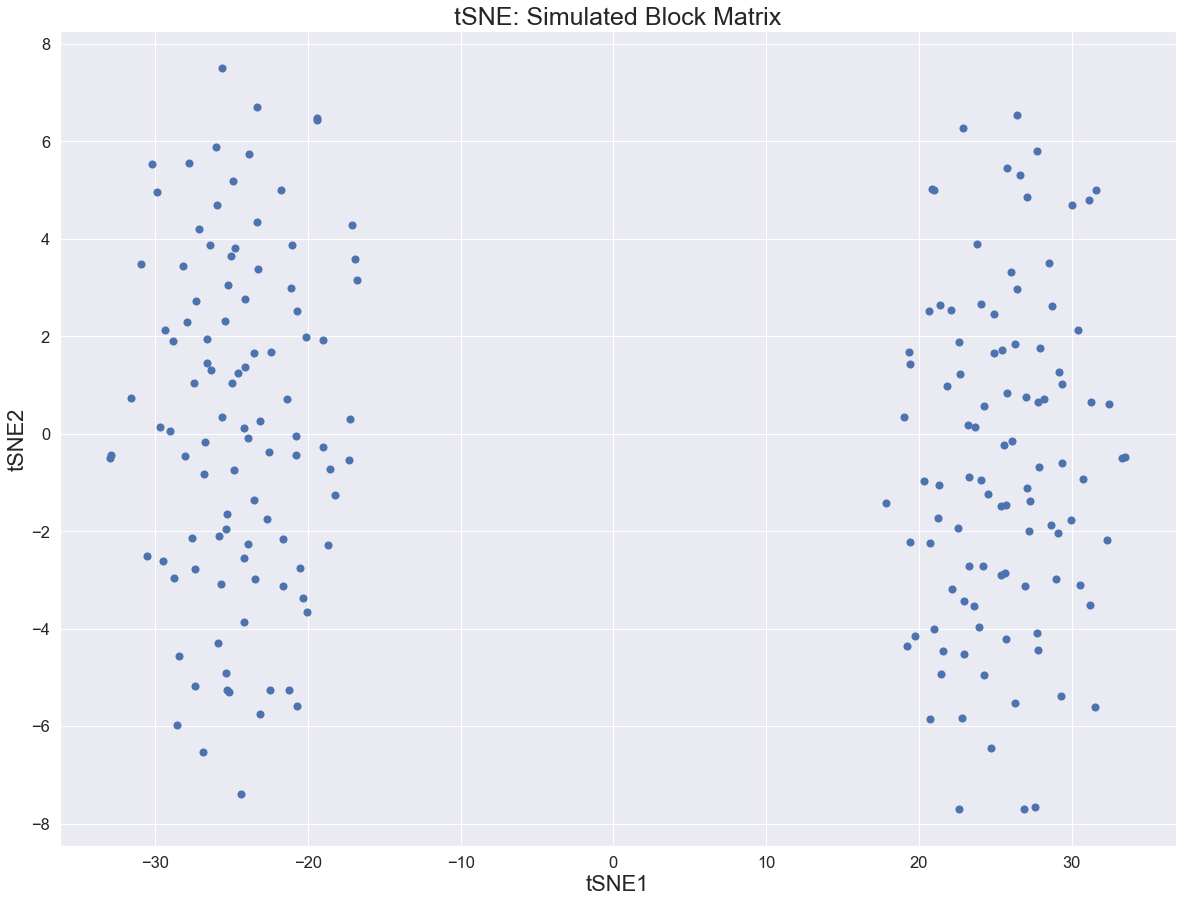

In [568]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

np.random.seed(1)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = block_matrix
X = np.log10(X + 1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

plt.figure(figsize = (20, 15))
pca = PCA(n_components = 10).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.xticks(range(0,9,1), labels = range(1,10,1))
plt.title('Variance Explained by Principal Components', fontsize = 20)
plt.xlabel("Principal Component", fontsize = 20)
plt.ylabel("Variance Explained", fontsize = 20)
plt.show()

plt.figure(figsize = (20, 15))
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = 'b')
plt.title('Principal Component Analysis (PCA): Simulated Block Matrix', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

plt.figure(figsize = (20, 15))
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
             perplexity = np.round(np.sqrt(block_df.shape[0]), 0), init = X_reduced, n_iter = 1000, verbose = 0)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = 'b')
plt.title('tSNE: Simulated Block Matrix', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.show()

Here we can see that almost all variance in the data is captured by the first principal component. This is not surprising because we know that there is a very strong dominating groupping effect of two clusters among the samples. Therefore, one can think about the number k of leading PCs (explaining most of the variation in the data) as a quick way to estimate the number of clusters in the data as k+1 clusters.

Next, we can see that already with two-block matrix the famous triangular shape of PCA becomes quite visible (with some imagination though). We can clearly see two clusters in both PCA and tSNE plots. However, what happens if we increase the number of blocks in the data matrix? Let us simulate a data matrix with three blocks and visualize the variance explained by each PC as well as PCA and tSNE plots.

In [185]:
import numpy as np
import pandas as pd

n_blocks = 3
block_size = 100
min_count = 0
max_count = 100

#Initialization
block_sub_matrix = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix[:, 0:block_size] = np.random.randint(min_count, max_count, size = (block_size, block_size))
block_matrix = block_sub_matrix
#Populating block matrix
for j in range(block_size, n_blocks*block_size, block_size):
    block_sub_matrix = np.block([np.zeros((block_size, block_size))]*n_blocks)
    block_sub_matrix[:,j:(j+block_size)] = np.random.randint(min_count, max_count, size = (block_size,block_size))
    block_matrix = np.vstack((block_matrix, block_sub_matrix))

block_df = pd.DataFrame(block_matrix, columns = ['V' + str(i) for i in range(block_matrix.shape[1])], 
                        index = ['S' + str(i) for i in range(block_matrix.shape[0])])

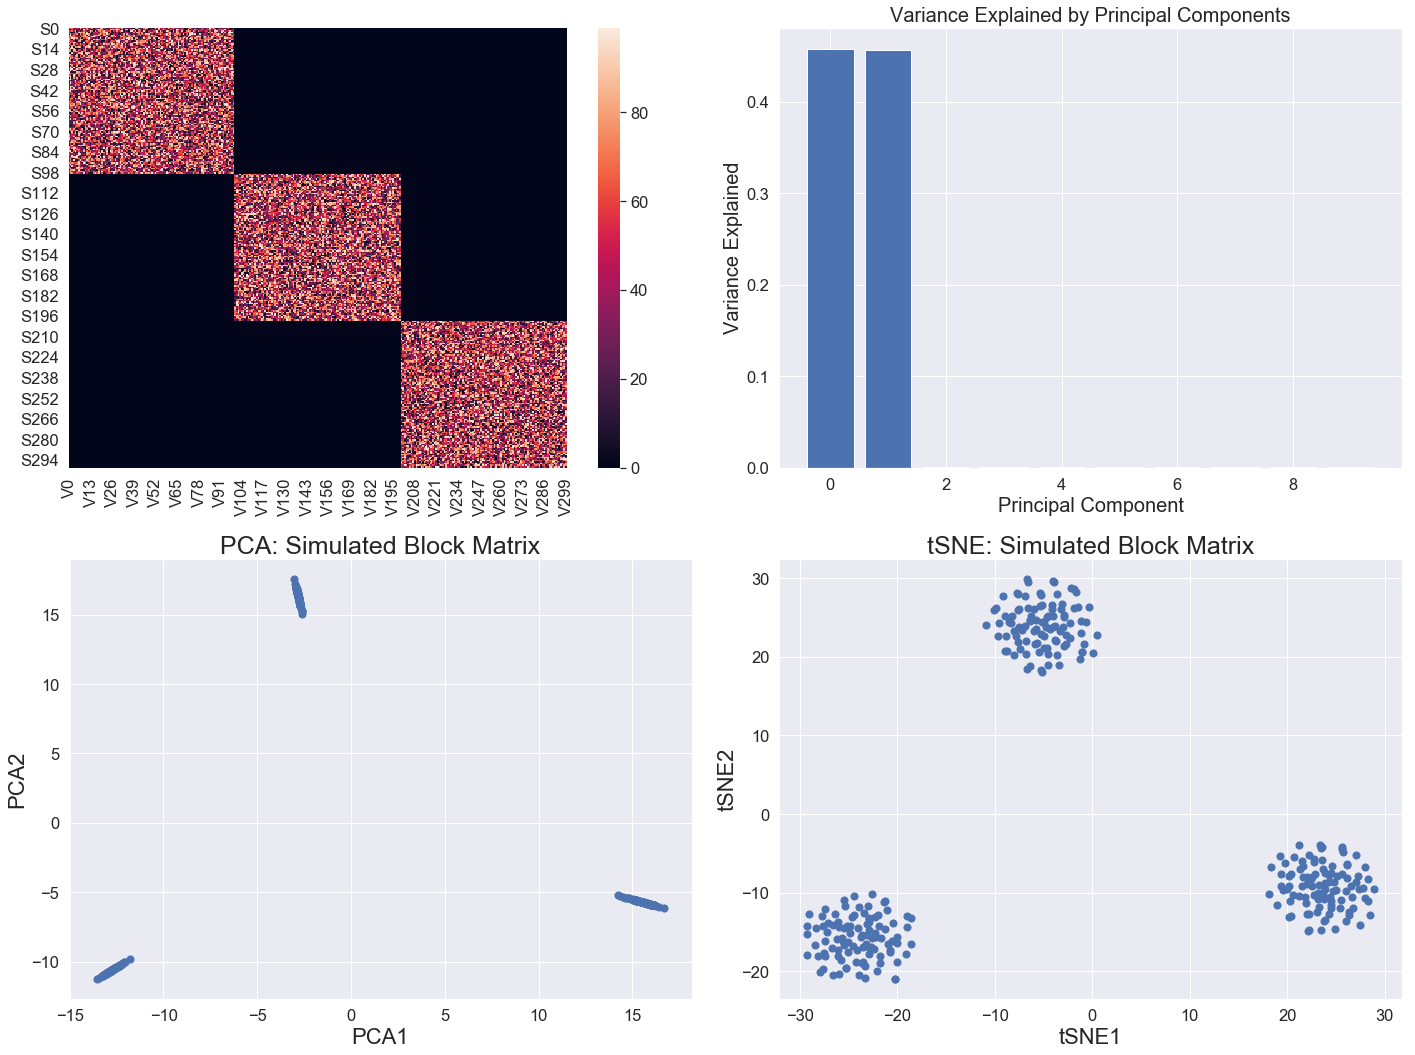

In [186]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = block_matrix
X = np.log10(X + 1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

figure = plt.figure(figsize = (20, 15))

plt.subplot(221)
sns.heatmap(block_df)

plt.subplot(222)
pca = PCA(n_components = 10).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.xticks(range(0,9,1), labels = range(1,10,1))
plt.title('Variance Explained by Principal Components', fontsize = 20)
plt.xlabel("Principal Component", fontsize = 20)
plt.ylabel("Variance Explained", fontsize = 20)

plt.subplot(223)
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = 'b')
plt.title('PCA: Simulated Block Matrix', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

plt.subplot(224)
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
             perplexity = np.round(np.sqrt(block_df.shape[0]), 0), init = X_reduced, n_iter = 1000, verbose = 0)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = 'b')
plt.title('tSNE: Simulated Block Matrix', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

figure.tight_layout()
plt.show()

As one might expect, we see that two PCs explain most of the variance in the data, and the three clusters of samples are clearly visible in both PCA and tSNE plots. The situation, however, changes dramatically when the number of clusters increases, when we have more than 2-3 clusters. Let us now simulate a block matrix with 10 distinct populations of samples.

In [187]:
import numpy as np
import pandas as pd

n_blocks = 10
block_size = 100
min_count = 0
max_count = 100

#Initialization
block_sub_matrix = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix[:, 0:block_size] = np.random.randint(min_count, max_count, size = (block_size, block_size))
block_matrix = block_sub_matrix
#Populating block matrix
for j in range(block_size, n_blocks*block_size, block_size):
    block_sub_matrix = np.block([np.zeros((block_size, block_size))]*n_blocks)
    block_sub_matrix[:,j:(j+block_size)] = np.random.randint(min_count, max_count, size = (block_size,block_size))
    block_matrix = np.vstack((block_matrix, block_sub_matrix))

block_df = pd.DataFrame(block_matrix, columns = ['V' + str(i) for i in range(block_matrix.shape[1])], 
                        index = ['S' + str(i) for i in range(block_matrix.shape[0])])

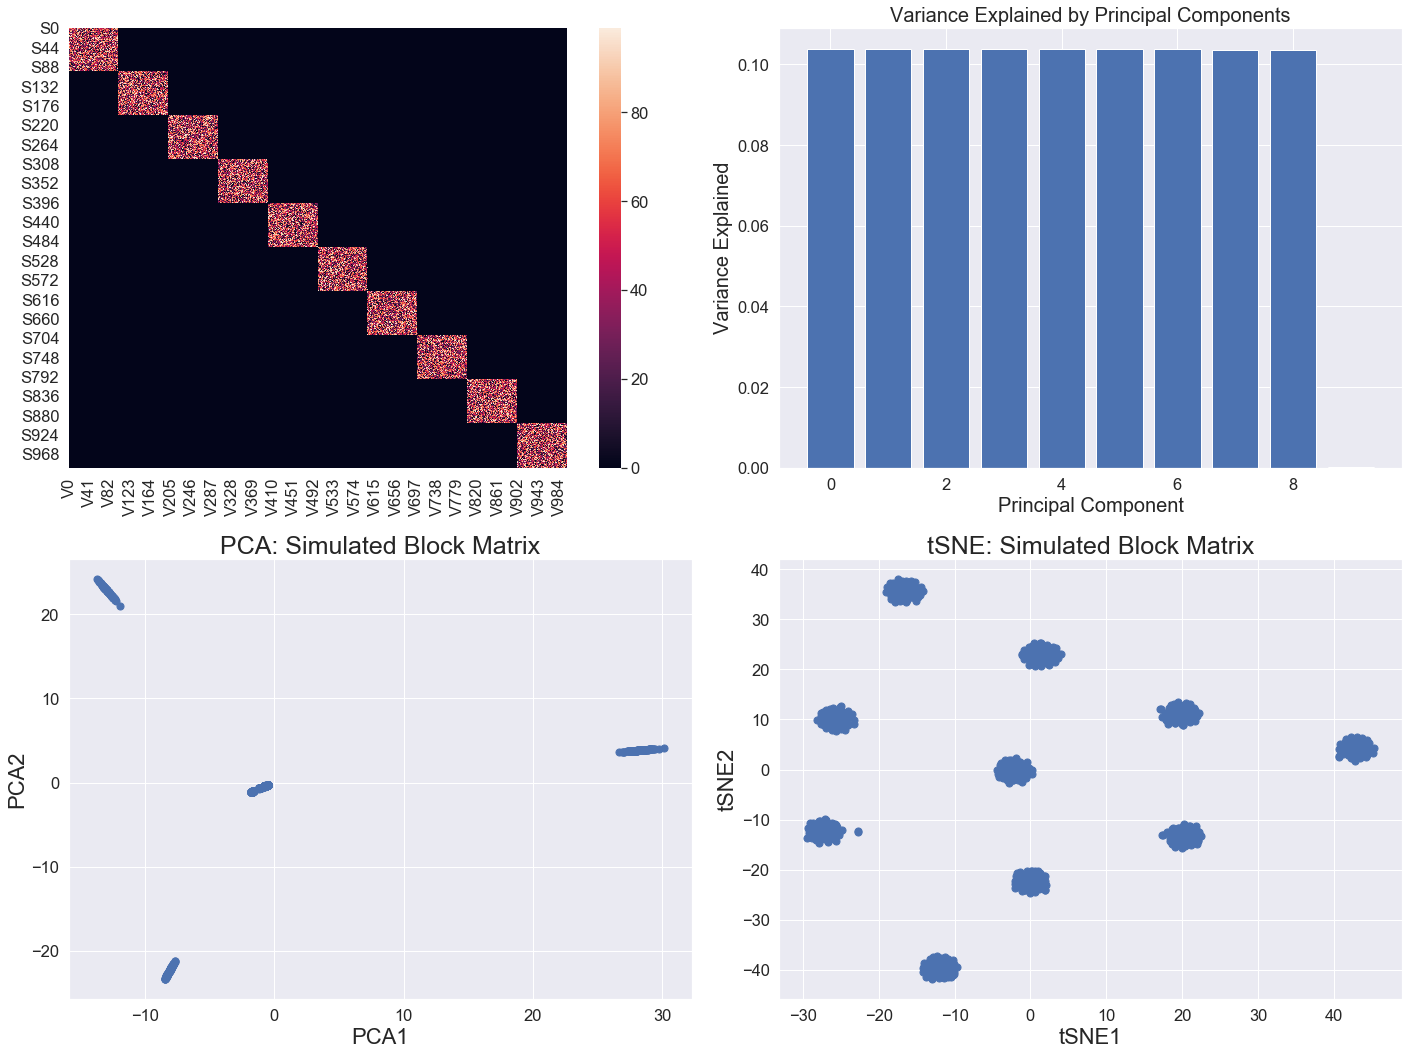

In [188]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = block_matrix
X = np.log10(X + 1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

figure = plt.figure(figsize = (20, 15))

plt.subplot(221)
sns.heatmap(block_df)

plt.subplot(222)
pca = PCA(n_components = 10).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.xticks(range(0,9,1), labels = range(1,10,1))
plt.title('Variance Explained by Principal Components', fontsize = 20)
plt.xlabel("Principal Component", fontsize = 20)
plt.ylabel("Variance Explained", fontsize = 20)

plt.subplot(223)
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = 'b')
plt.title('PCA: Simulated Block Matrix', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

plt.subplot(224)
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
             perplexity = np.round(np.sqrt(block_df.shape[0]), 0), init = X_reduced, n_iter = 1000, verbose = 0)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = 'b')
plt.title('tSNE: Simulated Block Matrix', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

figure.tight_layout()
plt.show()

A remarkable thing is that we do not seem to be able to distinguish 10 clusters in the PCA plot, in fact a few populations seem to clump together so that no more than 4 clear clusters can be detected from the visual inspection of the PCA plot. This would mean that any clustering algorithm would have big troubles groupping samples to their populations based on just two principal components even if we provide the exact number of populations in the data. Therefore one will need to consider more then two principal components to get a correct clustering of samples, this however will be increasingly more and more difficult to visualize, i.e. will be more and more difficult to reach an agreement between dimensionality reduction and clustering. Strikingly, tSNE seems to easiy resolve all the 10 clusters with only two latent tSNE variables. Even if this is not a good idea, but in priciple, clustering on the 2D tSNE picture would be successful (i.e. one would easily group all samples to their 10 populations) for this particular data.

### Data matrix with fuzzy block structure and horseshoue effect  <a class="anchor" id="Data-matrix-with-fuzzy-block-structure-and-horseshoue-effect"></a>

The extreme block structure descibed in the previous section is rarely encountered in real world data. Usually, the samples clusters are less transparent, one might expect data matrices with more fuzzy block structure to be quite typical for Life Sciences projects. One way to add some "fuzziness" to the previously describes block data matrix would be a **band data matrix**, where only elements around diagonal are non-zero. Here, we still suspect some sample clusters but they are not as transparent as for the block data matrix. Let us simulate and visualize a typical band data matrix with two "fuzzy" blocks.

In [897]:
import numpy as np
import pandas as pd

n_blocks = 2
block_size = 100
min_count = 0
max_count = 100

np.random.seed(1)

#Initialization
block_sub_matrix1 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix1[:, 0:block_size] = np.random.randint(min_count, max_count, size = (block_size, block_size))
block_sub_matrix1[:, block_size:(2*block_size)] = np.tril(np.random.randint(min_count, max_count, 
                                                                           size = (block_size, block_size)))

block_sub_matrix2 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix2[:, block_size:(2*block_size)] = np.random.randint(min_count, max_count, 
                                                                    size = (block_size, block_size))
block_sub_matrix2[:, 0:block_size] = np.triu(np.random.randint(min_count, max_count, 
                                                                           size = (block_size, block_size)))

block_matrix = np.vstack((block_sub_matrix1, block_sub_matrix2))

    
block_df = pd.DataFrame(block_matrix, columns = ['V' + str(i) for i in range(block_matrix.shape[1])], 
                        index = ['S' + str(i) for i in range(block_matrix.shape[0])])
block_df

V0    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  V190  \
S0    37.0  12.0  72.0   9.0  75.0   5.0  79.0  64.0  16.0   1.0  ...   0.0   
S1     0.0  77.0   6.0  52.0  85.0  70.0   2.0  76.0  91.0  21.0  ...   0.0   
S2    40.0  78.0  45.0  87.0  16.0  28.0  45.0  67.0  66.0  78.0  ...   0.0   
S3     0.0  86.0  16.0  19.0   9.0  92.0  51.0  10.0  68.0  23.0  ...   0.0   
S4    35.0  41.0  81.0   2.0  85.0  93.0  36.0  46.0  80.0  27.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
S195   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  88.0   
S196   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  17.0   
S197   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  56.0   
S198   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  46.0   
S199   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  18.0   

      V191  V192  V193  V194  V195  V196  V197  V198  V199  
S0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
S195  96.0  28.0  90.0  86.0  10.0  47.0   4.0  66.0  95.0  
S196  39.0  17.0   1.0  43.0  54.0  53.0  42.0  21.0  57.0  
S197   3.0  37.0  12.0  78.0  78.0  22.0  85.0  93.0  57.0  
S198  14.0  43.0  39.0  36.0  23.0  73.0  78.0  10.0  59.0  
S199   2.0  41.0  54.0  42.0   9.0  74.0   9.0  52.0  97.0  

[200 rows x 200 columns]

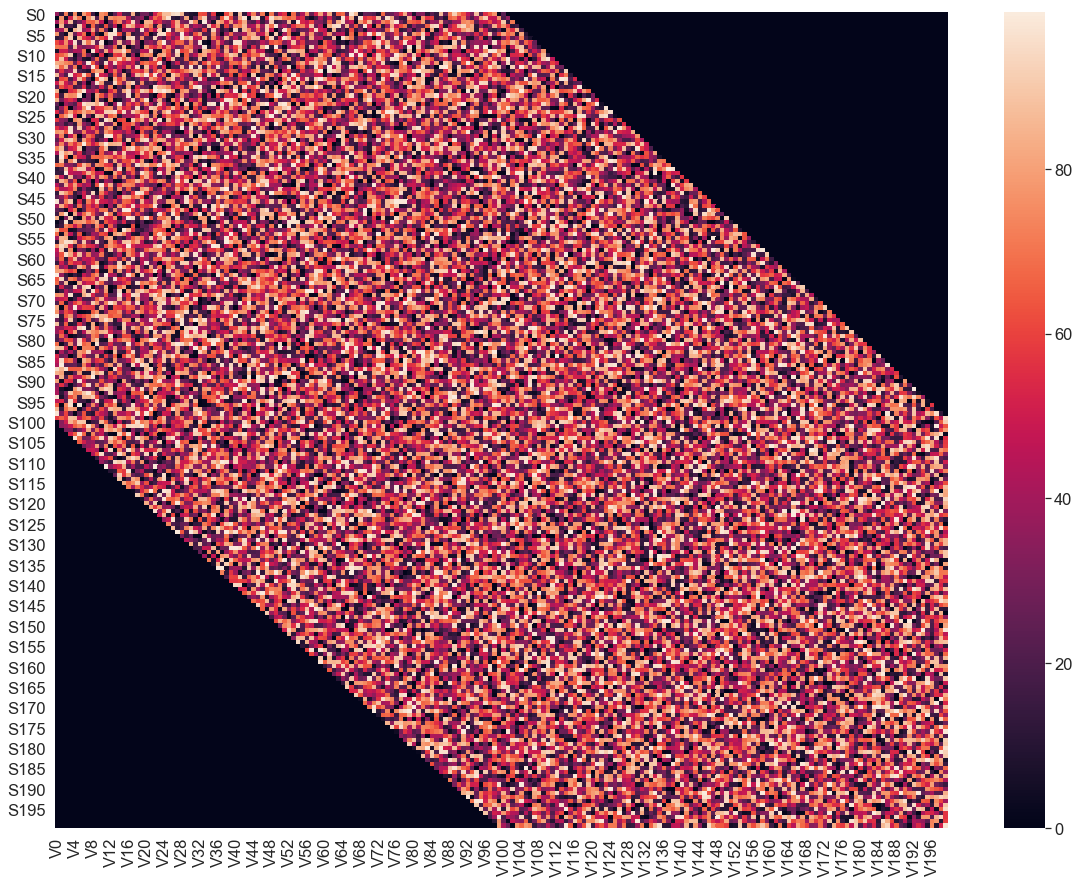

In [898]:
import seaborn as sns
plt.figure(figsize = (20, 15))
sns.heatmap(block_df)
plt.show()

This kind of band matrix might appear in computation biology projects when there is a strong spatial or temporal ordering of the samples, usually they say that there is a **gradient** that affects the abundances in the samples. Examples of such gradient can be pH, temperature, spatial coordinate, time period of sampling, there can be also technical gradients such as batch (lab, technology, country). Using the previous intuition about species present in a particular environment but absent in others, we can again average matrix elements across groups of variables (that correspond to two "species") and observe a more gradual, i.e. much less abrupt, change of species 1 and 2 abundances when changing from one environment to the other. Below we can see that e.g. species 1 can also be present (althoug in lower abundance) in the environment that was previusly occupied solely by species 2.

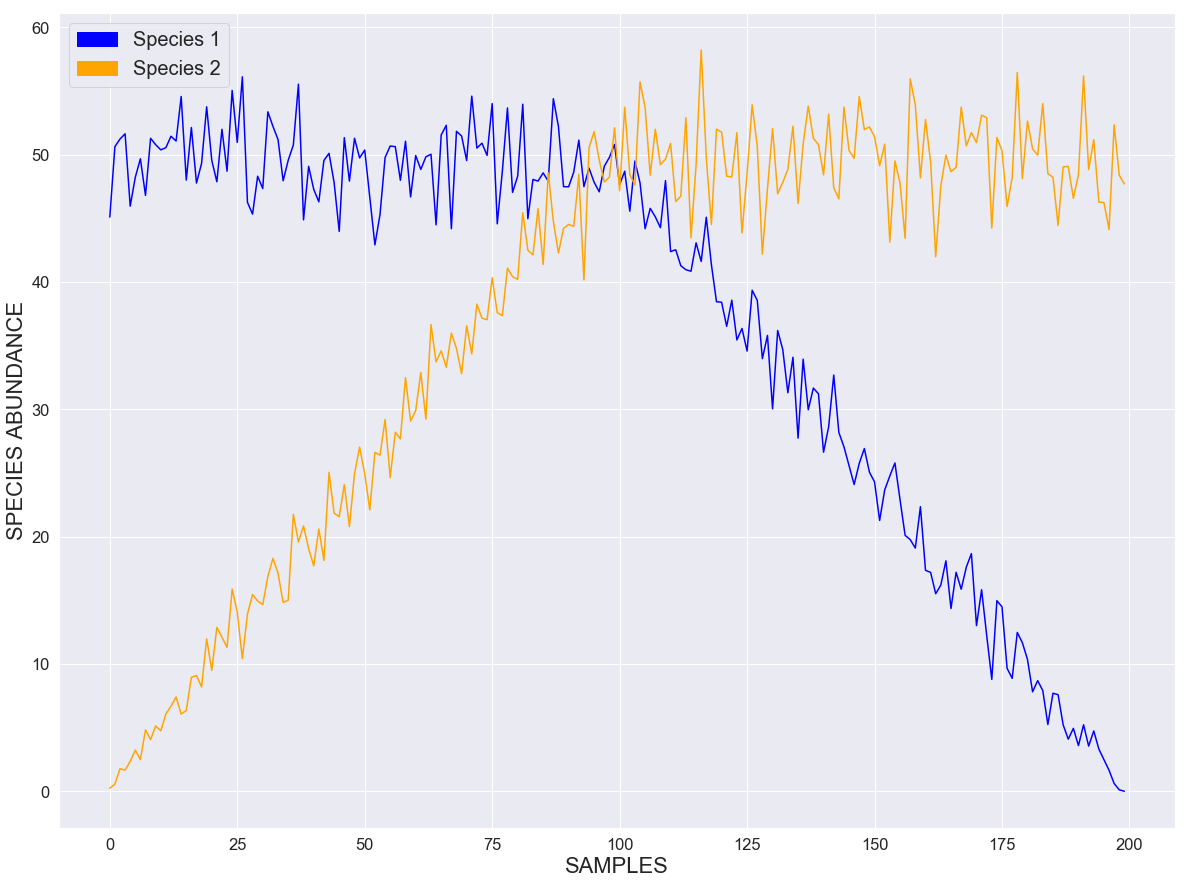

In [672]:
import seaborn as sns
sns.set(font_scale = 1.5)

plt.figure(figsize = (20, 15))

species1 = list(block_df.iloc[:,0:99].mean(axis = 1))
species2 = list(block_df.iloc[:,100:199].mean(axis = 1))

plt.plot(range(0,200,1), species1, color = 'blue')
plt.plot(range(0,200,1), species2, color = 'orange')
plt.ylabel('SPECIES ABUNDANCE', fontsize = 22)
plt.xlabel('SAMPLES', fontsize = 22)

from matplotlib import cm
import matplotlib.patches as mpatches
my_legends = [mpatches.Patch(color = 'blue', label = 'Species 1'), 
              mpatches.Patch(color = 'orange', label = 'Species 2')]
plt.legend(handles = my_legends, fontsize = 20)

plt.show()

What about a PCA for that band data matrix? Below we will compute the variance explained by principal components as well as visualize PCA and tSNE for the simulated band data matrix with presumably two fuzzy sample clusters.

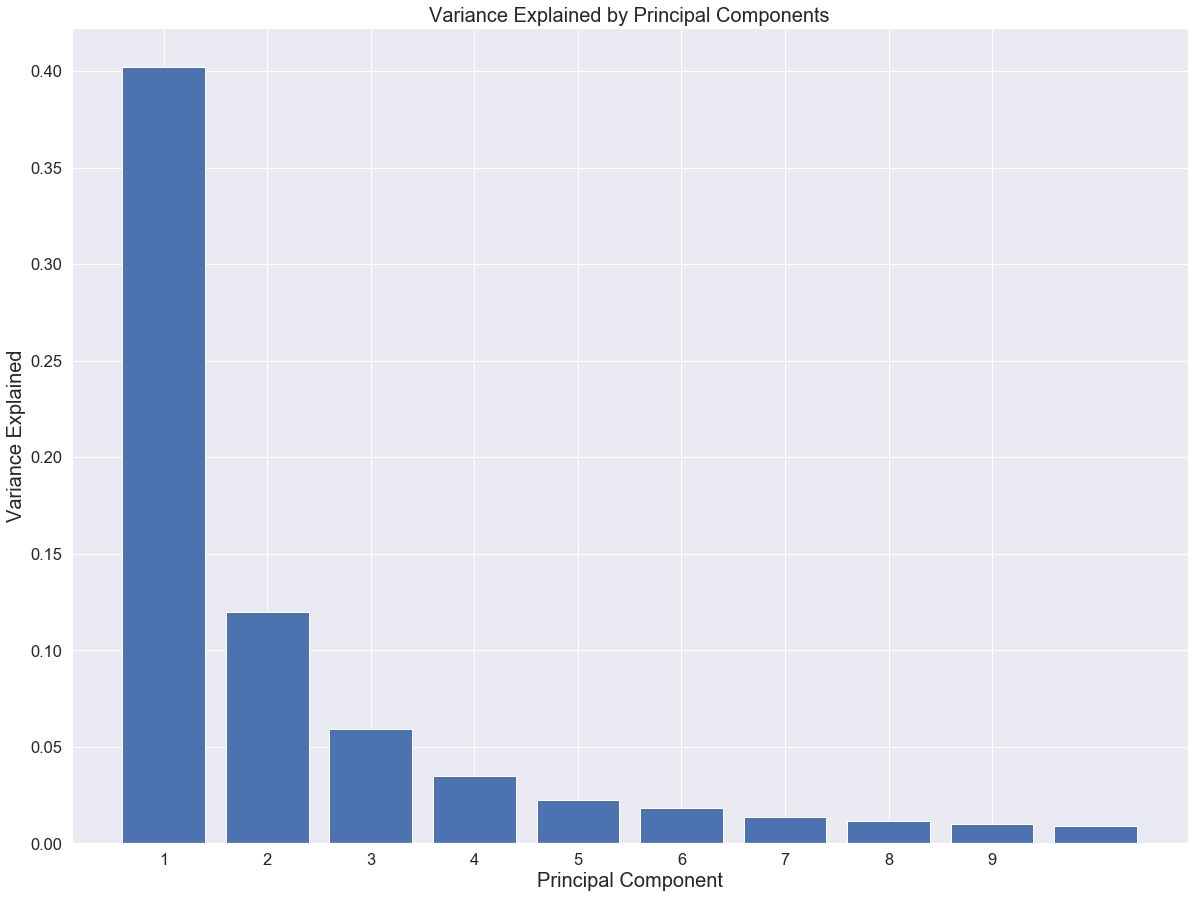

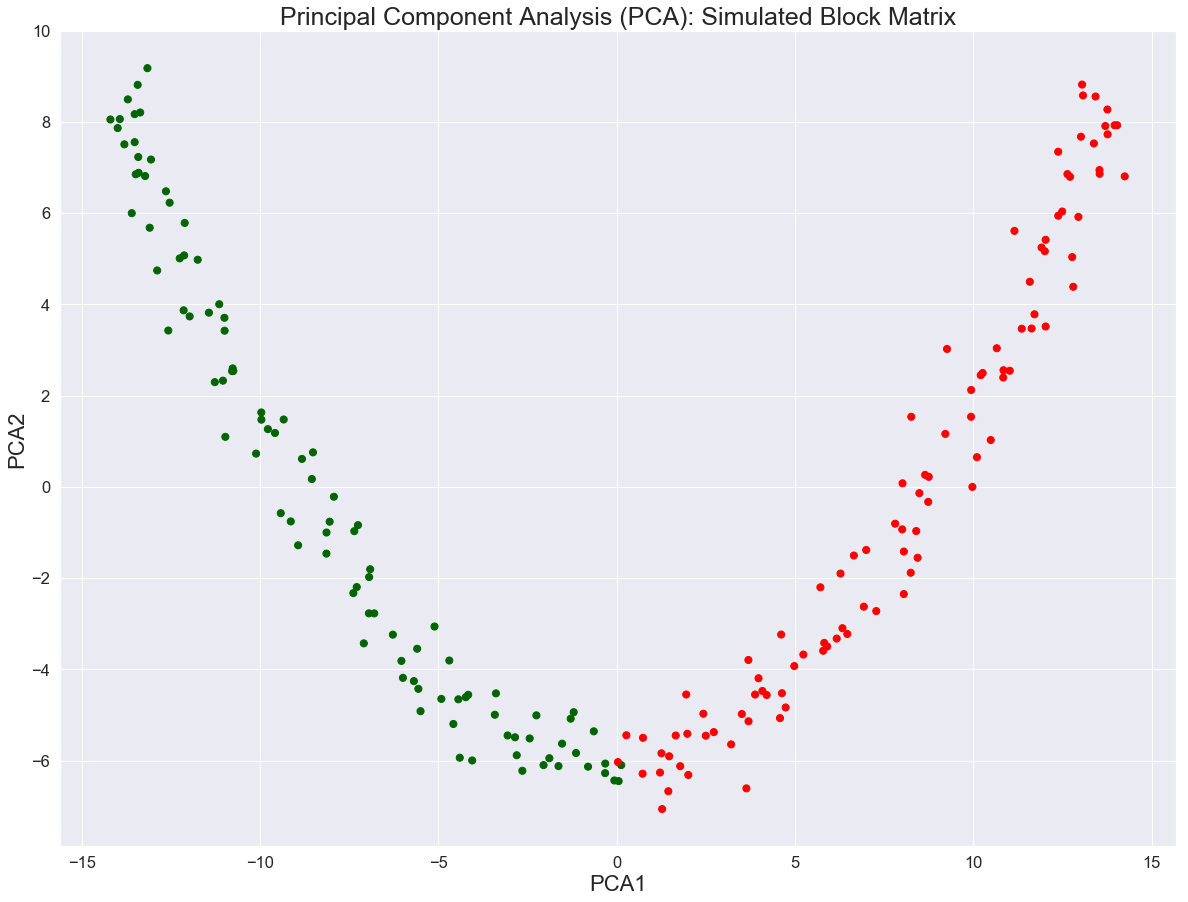

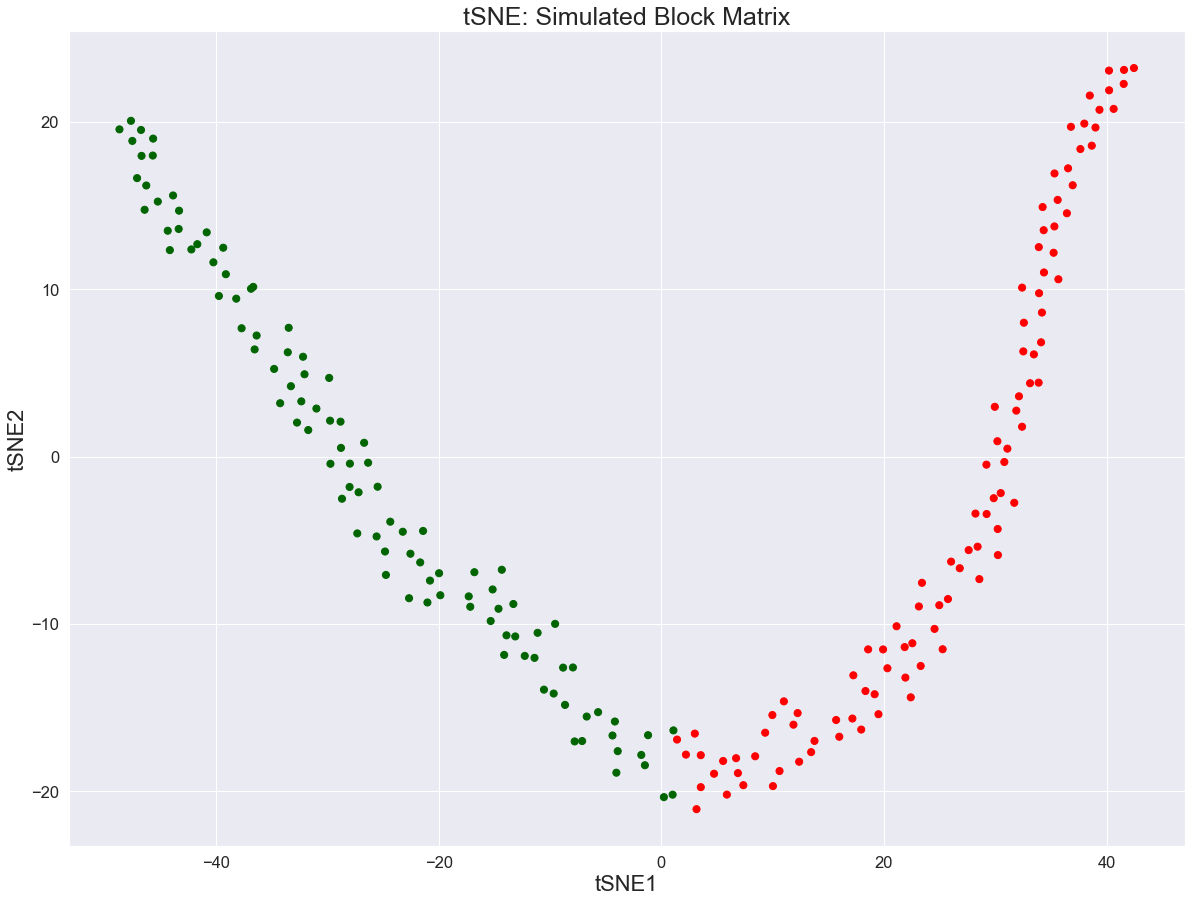

In [899]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

np.random.seed(1)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = block_matrix
X = np.log10(X + 1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

plt.figure(figsize = (20, 15))
pca = PCA(n_components = 10).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.xticks(range(0,9,1), labels = range(1,10,1))
plt.title('Variance Explained by Principal Components', fontsize = 20)
plt.xlabel("Principal Component", fontsize = 20)
plt.ylabel("Variance Explained", fontsize = 20)
plt.show()

plt.figure(figsize = (20, 15))
X_reduced = PCA(n_components = 2).fit_transform(X)
my_color = np.array([['darkgreen']*np.int(block_matrix.shape[0] / n_blocks), 
                     ['red']*np.int(block_matrix.shape[0] / n_blocks)]).flatten()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = my_color)
plt.title('Principal Component Analysis (PCA): Simulated Block Matrix', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

plt.figure(figsize = (20, 15))
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
             perplexity = np.round(np.sqrt(block_df.shape[0]), 0), init = X_reduced, n_iter = 1000, verbose = 0)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = my_color)
plt.title('tSNE: Simulated Block Matrix', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.show()

Here we observe the famous **arch or horseshoe** in the PCA (and also tSNE) plot. The shape of the data points spread is still triangular, and the two "wings" of the arch / horseshoe correspond to two different clusters. Also, please note the gradual change in the variance explained by principal components plot. With the clean block structure matrix there were a few equally important leading PCs, while now there is one leading PC that typically correspond to a strong gradient (e.g. temporal) that dominates the values of the band data matrix. Typically, they say that samples in such PCA plots are ordered along the horseshour from early to late in time (temporal ordering) or from geographic west to geographic east (spatial ordering). In single cell analysis such ordered "threads" of cells are typical when monitoring stem cell differentiation, i.e. when cells are ordered along so-called **cell fate trajectory**. Typically, **diffusion maps** (another type of dimension reduction technique) are great at resolving cell trajectories and ar widely used instead of PCA when working with cell development in single cell biology. What will happen if we increase the number of "fuzzy" sample populations?

In [900]:
import numpy as np
import pandas as pd

n_blocks = 3
block_size = 100
min_count = 0
max_count = 100

np.random.seed(1)

#Initialization
block_sub_matrix1 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix1[:, 0:block_size] = np.random.randint(min_count, max_count, size = (block_size, block_size))
block_sub_matrix1[:, block_size:(2*block_size)] = np.tril(np.random.randint(min_count, max_count, 
                                                                           size = (block_size, block_size)))

block_sub_matrix2 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix2[:, block_size:(2*block_size)] = np.random.randint(min_count, max_count, 
                                                                    size = (block_size, block_size))
block_sub_matrix2[:, 0:block_size] = np.triu(np.random.randint(min_count, max_count, 
                                                                           size = (block_size, block_size)))
block_sub_matrix2[:, (2*block_size):(3*block_size)] = np.tril(np.random.randint(min_count, max_count, 
                                                                                size = (block_size, block_size)))

block_sub_matrix3 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix3[:, (2*block_size):(3*block_size)] = np.random.randint(min_count, max_count, 
                                                                        size = (block_size, block_size))
block_sub_matrix3[:, block_size:(2*block_size)] = np.triu(np.random.randint(min_count, max_count, 
                                                                           size = (block_size, block_size)))

block_matrix = np.vstack((block_sub_matrix1, block_sub_matrix2, block_sub_matrix3))

    
block_df = pd.DataFrame(block_matrix, columns = ['V' + str(i) for i in range(block_matrix.shape[1])], 
                        index = ['S' + str(i) for i in range(block_matrix.shape[0])])
block_df

V0    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  V290  \
S0    37.0  12.0  72.0   9.0  75.0   5.0  79.0  64.0  16.0   1.0  ...   0.0   
S1     0.0  77.0   6.0  52.0  85.0  70.0   2.0  76.0  91.0  21.0  ...   0.0   
S2    40.0  78.0  45.0  87.0  16.0  28.0  45.0  67.0  66.0  78.0  ...   0.0   
S3     0.0  86.0  16.0  19.0   9.0  92.0  51.0  10.0  68.0  23.0  ...   0.0   
S4    35.0  41.0  81.0   2.0  85.0  93.0  36.0  46.0  80.0  27.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
S295   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  36.0   
S296   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  91.0   
S297   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  25.0   
S298   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  67.0   
S299   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  79.0   

      V291  V292  V293  V294  V295  V296  V297  V298  V299  
S0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
S295  16.0  92.0  92.0  19.0   5.0  75.0  38.0  34.0  90.0  
S296  95.0  32.0   4.0  55.0  45.0  99.0  90.0  51.0  91.0  
S297  91.0  79.0   0.0  52.0  28.0  91.0   8.0  55.0  13.0  
S298  43.0  47.0  96.0  43.0  49.0  45.0  46.0  21.0  50.0  
S299  95.0  24.0  98.0  61.0   9.0  21.0  57.0  63.0  68.0  

[300 rows x 300 columns]

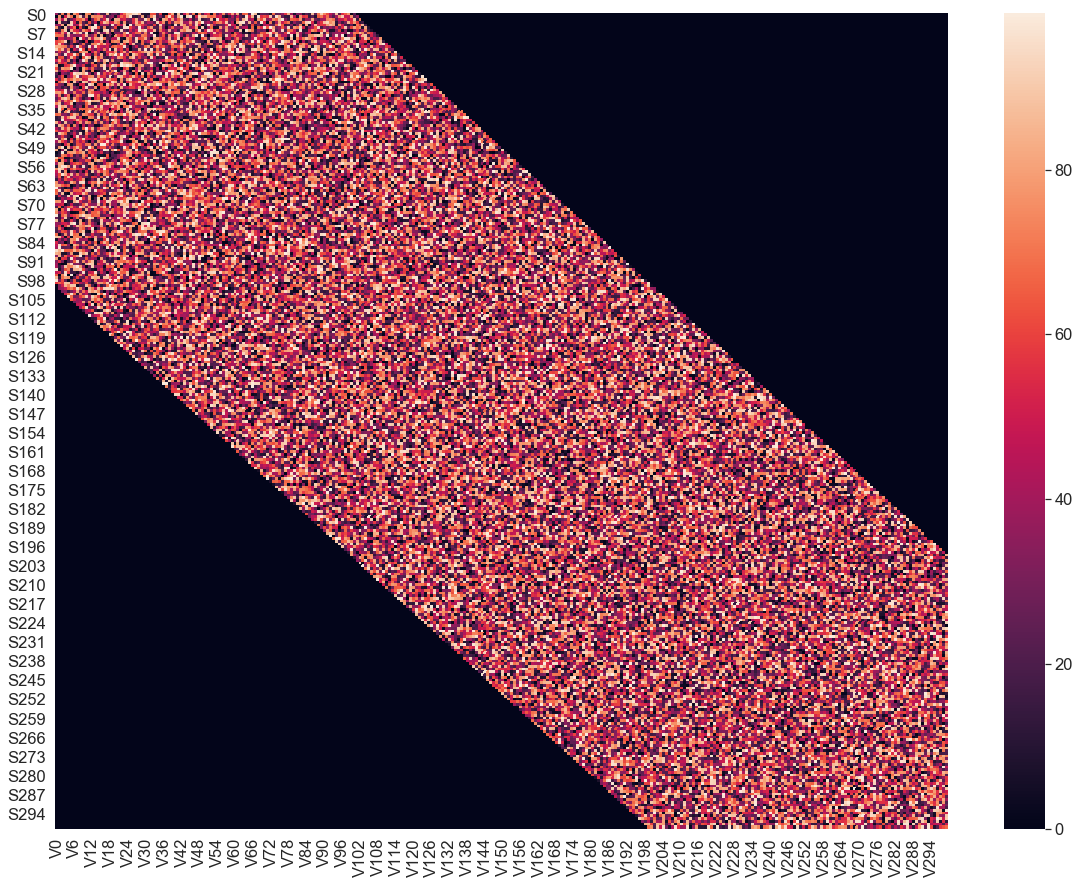

In [902]:
import seaborn as sns
plt.figure(figsize = (20, 15))
sns.heatmap(block_df)
plt.show()

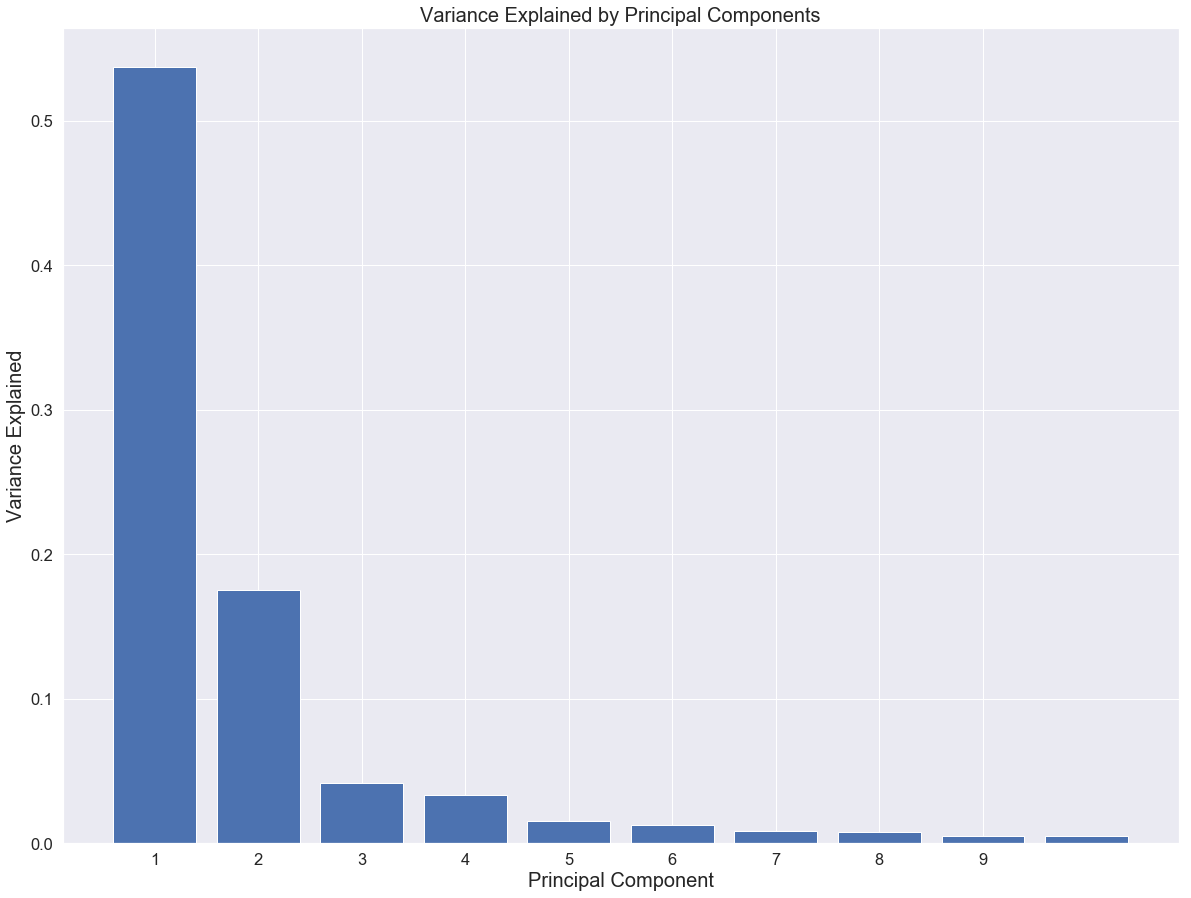

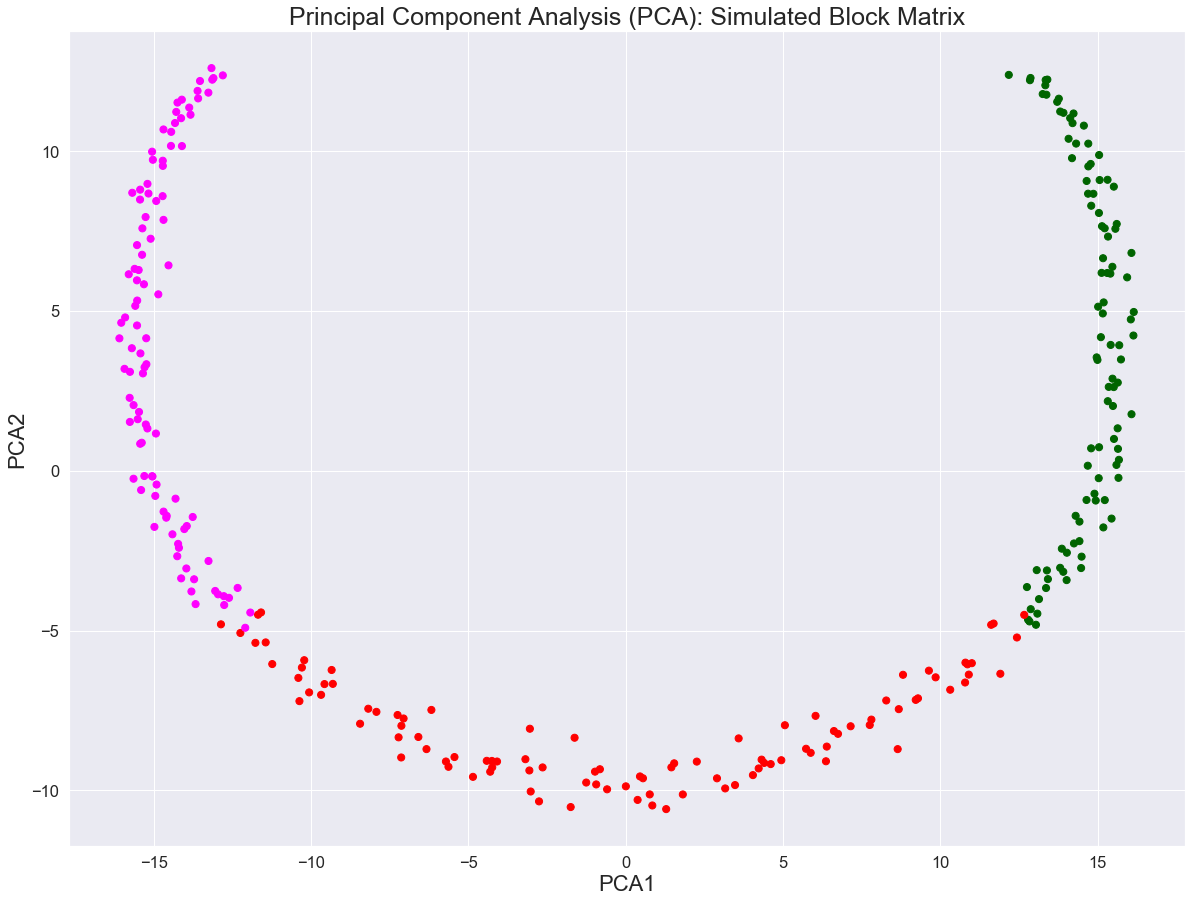

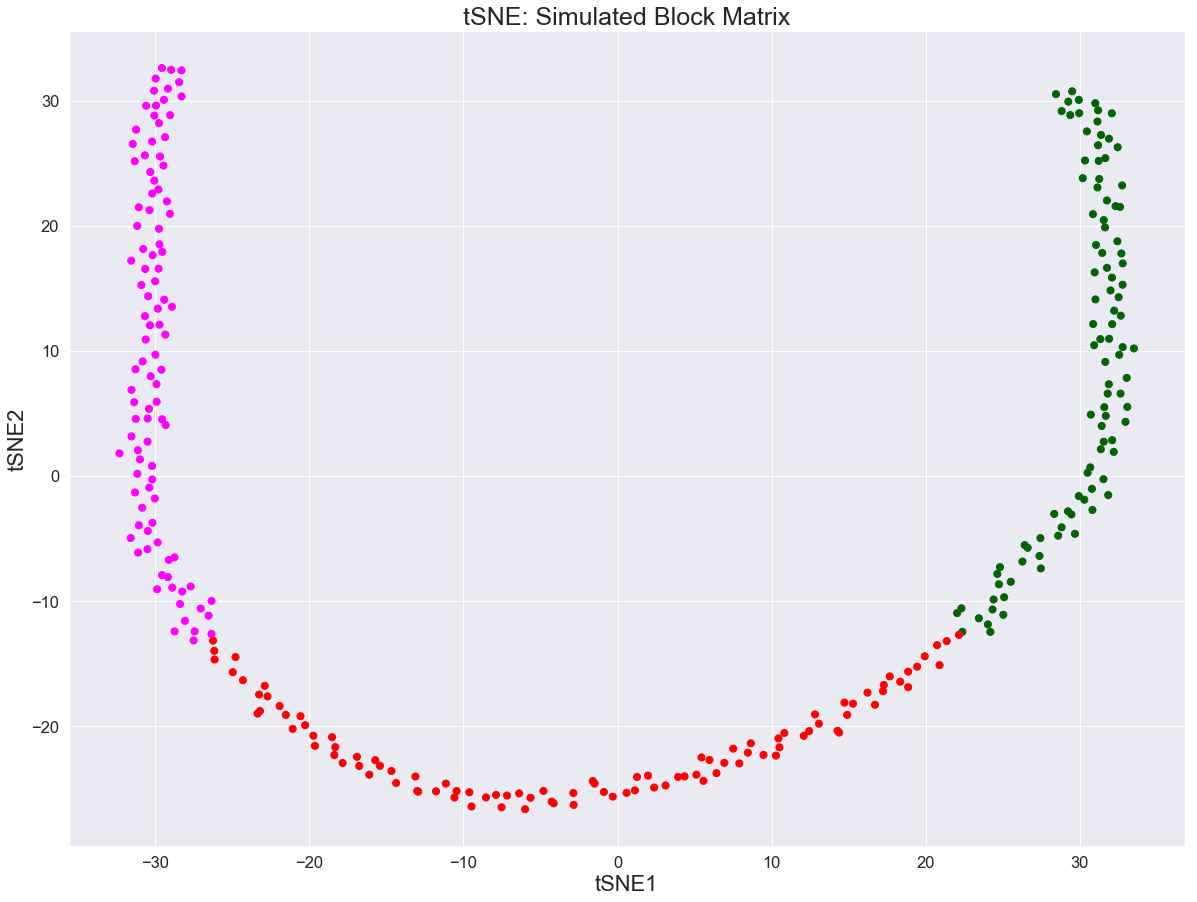

In [901]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

np.random.seed(1)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = block_matrix
X = np.log10(X + 1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

plt.figure(figsize = (20, 15))
pca = PCA(n_components = 10).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.xticks(range(0,9,1), labels = range(1,10,1))
plt.title('Variance Explained by Principal Components', fontsize = 20)
plt.xlabel("Principal Component", fontsize = 20)
plt.ylabel("Variance Explained", fontsize = 20)
plt.show()

plt.figure(figsize = (20, 15))
X_reduced = PCA(n_components = 2).fit_transform(X)
my_color = np.array([['darkgreen']*np.int(block_matrix.shape[0] / n_blocks), 
                     ['red']*np.int(block_matrix.shape[0] / n_blocks), 
                     ['magenta']*np.int(block_matrix.shape[0] / n_blocks)]).flatten()
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = my_color)
plt.title('Principal Component Analysis (PCA): Simulated Block Matrix', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

plt.figure(figsize = (20, 15))
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
             perplexity = np.round(np.sqrt(block_df.shape[0]), 0), init = X_reduced, n_iter = 1000, verbose = 0)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = my_color)
plt.title('tSNE: Simulated Block Matrix', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

plt.show()

We can see that the ends of the horseshoue start bending towards the center of mass. Another thing that we can observe is that the darkgreen and magenta sample populations seem to be very distant from each other while having the red sample population as a common neighbor. This fact can be intuitively understood if we look at band data matrix and realize that the first 100 (darkgreen) and last 100 (magenta) samples hardly share any variables, while the red samples (100 samples in the middle of the band matrix) share plenty of V-variables with both magenta and darkgreen sample populations. Now, let us increase the number of "fuzzy" blocks even more and see what happens to the PCA and tSNE plots.

In [1]:
import numpy as np
import pandas as pd

n_blocks = 10
block_size = 100
min_count = 0
max_count = 100

np.random.seed(1)

#Initialization
block_sub_matrix1 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix1[:, 0:block_size] = \
np.random.randint(min_count, max_count, size = (block_size, block_size))
block_sub_matrix1[:, block_size:(2*block_size)] = \
np.tril(np.random.randint(min_count, max_count, size = (block_size, block_size)))
block_sub_matrix2_tot = block_sub_matrix1

#Populating band matrix
for j in range(block_size, (n_blocks-1)*block_size, block_size):
    block_sub_matrix2 = np.block([np.zeros((block_size, block_size))]*n_blocks)
    block_sub_matrix2[:, j:(j+block_size)] = \
    np.random.randint(min_count, max_count, size = (block_size, block_size))
    block_sub_matrix2[:, (j-block_size):j] = \
    np.triu(np.random.randint(min_count, max_count, size = (block_size, block_size)))
    block_sub_matrix2[:, (j+block_size):(j+2*block_size)] = \
    np.tril(np.random.randint(min_count, max_count, size = (block_size, block_size)))
    block_sub_matrix2_tot = np.vstack((block_sub_matrix2_tot, block_sub_matrix2))

#Final brick in the band matrix
block_sub_matrix3 = np.block([np.zeros((block_size, block_size))]*n_blocks)
block_sub_matrix3[:,((n_blocks-1)*block_size):(n_blocks*block_size)] = \
np.random.randint(min_count, max_count, size = (block_size, block_size))
block_sub_matrix3[:, ((n_blocks-2)*block_size):((n_blocks-1)*block_size)] = \
np.triu(np.random.randint(min_count, max_count, size = (block_size, block_size)))

band_matrix = np.vstack((block_sub_matrix2_tot, block_sub_matrix3))

band_df = pd.DataFrame(band_matrix, columns = ['V' + str(i) for i in range(band_matrix.shape[1])], 
                       index = ['S' + str(i) for i in range(band_matrix.shape[0])])
band_df

V0    V1    V2    V3    V4    V5    V6    V7    V8    V9  ...  V990  \
S0    37.0  12.0  72.0   9.0  75.0   5.0  79.0  64.0  16.0   1.0  ...   0.0   
S1     0.0  77.0   6.0  52.0  85.0  70.0   2.0  76.0  91.0  21.0  ...   0.0   
S2    40.0  78.0  45.0  87.0  16.0  28.0  45.0  67.0  66.0  78.0  ...   0.0   
S3     0.0  86.0  16.0  19.0   9.0  92.0  51.0  10.0  68.0  23.0  ...   0.0   
S4    35.0  41.0  81.0   2.0  85.0  93.0  36.0  46.0  80.0  27.0  ...   0.0   
...    ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   ...   
S995   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...   3.0   
S996   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  99.0   
S997   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  30.0   
S998   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  40.0   
S999   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  ...  48.0   

      V991  V992  V993  V994  V995  V996  V997  V998  V999  
S0     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S1     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S2     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S3     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
S4     0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
...    ...   ...   ...   ...   ...   ...   ...   ...   ...  
S995  60.0  34.0  82.0  42.0  43.0   3.0  61.0  15.0  36.0  
S996  78.0   5.0   0.0   1.0  45.0   2.0  46.0  32.0  14.0  
S997  39.0  19.0  52.0  92.0  70.0  57.0  27.0  30.0  70.0  
S998   6.0  85.0  40.0  99.0   4.0  96.0  77.0   6.0  57.0  
S999  67.0  17.0  45.0  23.0  81.0  26.0  75.0  29.0  22.0  

[1000 rows x 1000 columns]

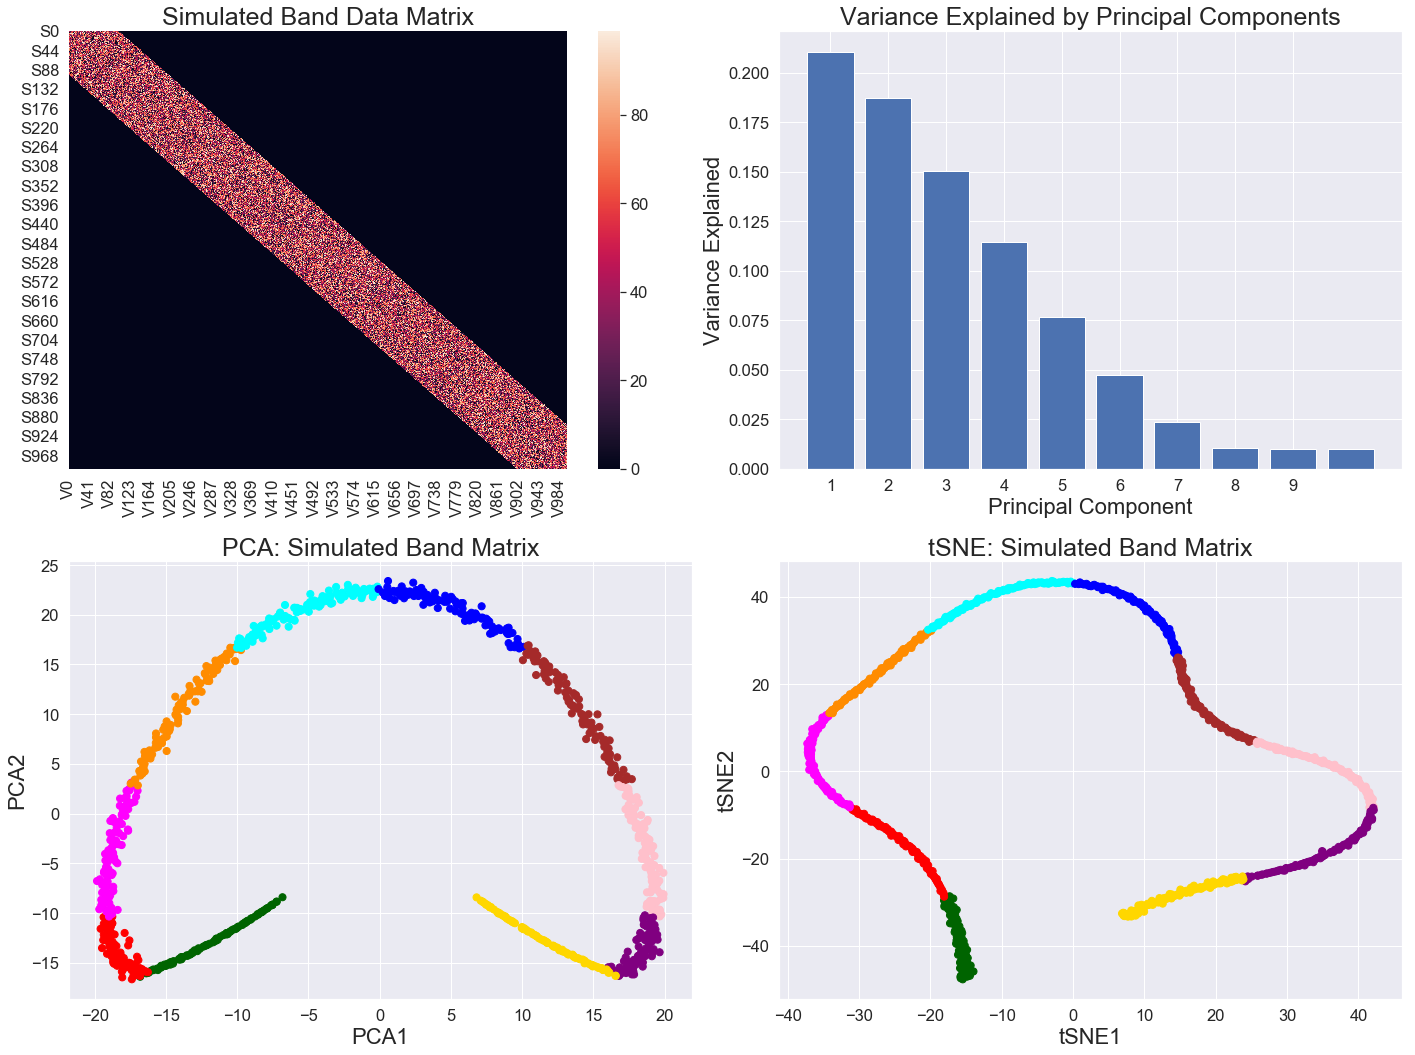

In [4]:
import warnings
warnings.filterwarnings("ignore")

import seaborn as sns
sns.set(font_scale = 1.5)

np.random.seed(1)

import numpy as np
from umap.umap_ import UMAP
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

X = band_matrix
X = np.log10(X + 1)
X = (X - np.mean(X, axis = 0)) / np.std(X, axis = 0)

figure = plt.figure(figsize = (20, 15))

plt.subplot(221)
sns.heatmap(band_df)
plt.title('Simulated Band Data Matrix', fontsize = 25)

plt.subplot(222)
pca = PCA(n_components = 10).fit(X)
index = np.arange(len(pca.explained_variance_ratio_))
plt.bar(index, pca.explained_variance_ratio_)
plt.xticks(range(0,9,1), labels = range(1,10,1))
plt.title('Variance Explained by Principal Components', fontsize = 25)
plt.xlabel("Principal Component", fontsize = 22)
plt.ylabel("Variance Explained", fontsize = 22)

my_color = np.array([['darkgreen']*np.int(band_matrix.shape[0] / n_blocks), 
                     ['red']*np.int(band_matrix.shape[0] / n_blocks), 
                     ['magenta']*np.int(band_matrix.shape[0] / n_blocks),
                     ['darkorange']*np.int(band_matrix.shape[0] / n_blocks),
                     ['cyan']*np.int(band_matrix.shape[0] / n_blocks),
                     ['blue']*np.int(band_matrix.shape[0] / n_blocks),
                     ['brown']*np.int(band_matrix.shape[0] / n_blocks),
                     ['pink']*np.int(band_matrix.shape[0] / n_blocks),
                     ['purple']*np.int(band_matrix.shape[0] / n_blocks),
                     ['gold']*np.int(band_matrix.shape[0] / n_blocks)]).flatten()

plt.subplot(223)
X_reduced = PCA(n_components = 2).fit_transform(X)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], s = 50, c = my_color)
plt.title('PCA: Simulated Band Matrix', fontsize = 25)
plt.xlabel("PCA1", fontsize = 22); plt.ylabel("PCA2", fontsize = 22)

plt.subplot(224)
model = TSNE(learning_rate = 200, n_components = 2, random_state = 123, 
             perplexity = np.round(np.sqrt(band_df.shape[0]), 0), init = X_reduced, n_iter = 1000, verbose = 0)
tsne = model.fit_transform(X)
plt.scatter(tsne[:, 0], tsne[:, 1], s = 50, c = my_color)
plt.title('tSNE: Simulated Band Matrix', fontsize = 25)
plt.xlabel("tSNE1", fontsize = 22); plt.ylabel("tSNE2", fontsize = 22)

figure.tight_layout()
plt.show()

One obvios thing here is that the ends of the horseshoe in the PCA plot are now bent quite a lot toward the center of mass of the horseshoue. Therefore, here we have a counter-intuitive effect: the gold and darkgreen sample populations at the ends of the horseshoue seem to be much closer to each other than to e.g. cyan and blue sample populations in the middle of the horseshoue (and they will be approaching each other even more if we increase the number of "fuzzy" blocks in the data matrix). Now, imagine that there was a **temporal gradient** acting along the horseshoue, i.e. the samples were odered from early in time to later in time with darkgreen samples being youngest and gold samples being oldest while the cyan and blue samples are from some intermediate times. What this mutual approaching of the ends of the horseshoue means us that **the youngest and the oldest samples become very similar to each other compared to the samples from the intermediate time**, which is strange. One would expect that the youngest and the oldest samples are more dissimilar to each other than they both are with respect to the intermediate time samples.

The interpretation of the PCA horseshoue becomes even trickier when comparing genetic variation across world populations. If there is a **spatial gradient** (geographic separation) of samples where genetic variation was measured as the V-variables in the band data matrix, **it might seem from the PCA plot that populations from far east are more genetically similar to the populations from far west than with respect to their common neighbours**.